In [208]:
import pandas as pd
import numpy as np

In [209]:
df = pd.read_csv("data_rumah_tangga_all.csv")

In [210]:
df.head()

,#,ID,Nama Kepala Keluarga,Nomor Kartu Keluarga,Tanggal Pendataan,Dusun,Desa/Kelurahan,Kecamatan,Kabupaten,Propinsi,...,Apakah pernah dapat bantuan dari pemerintah?,"Kalau iya, apa bentuk bantuan tersebut?",Jumlah difabel (berkebutuhan khusus),Jenis Difabel,Memiliki anak usia kurang dari 5 tahun,Tinggi badan anak,Berat badan anak,Apakah anak mengalami kasus gizi buruk?,Apakah anak mengalami kekurangan gizi?,SourceFile
0,1,22180,Natalia Benga Blolong,5.313011e+15,2024-09-23 00:00:00,A Arubala,Lolong,Nagawutung,Lembata,Nusa Tenggara Timur,...,Pernah;,Tunai;,0;,Tidak ada;,Tidak ada;,0;,0;,Tidak ada;,Tidak ada;,1-400.xlsx
1,2,22190,Marianus Nurak,5.313052e+15,2024-10-07 00:00:00,Alapnimo,Paubokol,Nubatukan,Lembata,Nusa Tenggara Timur,...,Pernah;,Tunai;,0;,Tidak ada;,Ada;,76;,"8,7;",Tidak ada;,Tidak ada;,1-400.xlsx
2,3,22195,Viktor Gelak,5.313052e+15,2024-10-07 00:00:00,Alapnimo,Paubokol,Nubatukan,Lembata,Nusa Tenggara Timur,...,Pernah;,Tunai;,0;,Tidak ada;,Tidak ada;,0;,0;,Tidak ada;,Tidak ada;,1-400.xlsx
3,4,22200,Yoseph Kujo,5.313051e+15,2024-10-08 00:00:00,Alapnimo,Paubokol,Nubatukan,Lembata,Nusa Tenggara Timur,...,Pernah;,Tunai;,0;,Tidak ada;,Ada;,97;,"15,2;",Tidak;,Tidak;,1-400.xlsx
4,5,22205,Hendrikus Laran Ujan,5.313052e+15,2024-10-08 00:00:00,Alapnimo,Paubokol,Nubatukan,Lembata,Nusa Tenggara Timur,...,Pernah;,Tunai;,0;,Tidak ada;,Ada;,86;,10;,Tidak ada;,Ya;,1-400.xlsx


In [211]:
df['Desa/Kelurahan'] = df['Desa/Kelurahan'].str.replace(r'\bPADA\b', 'Pada', regex=True)

In [212]:
for i, col in enumerate(df.columns):
    print(f"{i}. {col}")

0. #
1. ID
2. Nama Kepala Keluarga
3. Nomor Kartu Keluarga
4. Tanggal Pendataan
5. Dusun
6. Desa/Kelurahan
7. Kecamatan
8. Kabupaten
9. Propinsi
10. Koordinat GPS
11. Sumber Listrik
12. Air Bersih
13. Kepemilikan Rumah
14. Nama
15. Jumlah Anggota Keluarga (jiwa)
16. Agama/ Kepercayaan
17. Pekerjaan
18. Pendapatan Bulanan (Rp.)
19. Beras Lokal (Sawah/Ladang dalam Kg)
20. Singkong
21. Jagung Lokal
22. Jagung Hibrida
23. Umbi-umbian lain
24. Sorgum
25. Jewawut/Weteng
26. Ikan dan Boga Laut Segar
27. Ikan dan Boga Laut Kering
28. Telor
29. Ayam
30. Daging (Sapi/Kerbau/Kambing/Babi,dll)
31. Kacang-kacangan
32. Minyak Kelapa
33. Cabai Besar
34. Cabai Kecil
35. Kemiri
36. Kunyit
37. Jahe
38. Sereh
39. Lengkuas
40. Jeruk Nipis
41. Mete
42. Lain-lain
43. Beras Lokal (Sawah/Ladang)
44. Singkong.1
45. Jagung Lokal.1
46. Jagung Hibrida.1
47. Umbi-umbian lain.1
48. Sorgum.1
49. Jewawut/Weteng.1
50. Ikan dan Boga Laut Segar.1
51. Ikan dan Boga Laut Kering.1
52. Telor.1
53. Ayam.1
54. Kacang-kacangan

In [213]:
df = pd.concat(
    [df[['ID', 'Desa/Kelurahan', 'Nama Kepala Keluarga', 'Pekerjaan', 'Pendapatan Bulanan (Rp.)', 'Sumber Listrik',
    'Air Bersih', 'Iuran BPJS', 'Obat', 'Pulsa Ponsel',
    'Nama Tanaman', 'Sumber Benih', 'Luas Lahan', 'Produktivitas', 'Pola Tanam', 'Sistem Budidaya', 'Pengairan',
    'Pupuk', 'Pestisida/Herbisida/Fungisida', 'Benih', 'Upah Buruh', 'Sewa Alat dan Mesin Pertanian', 
    'Sapi', 'Kerbau', 'Kambing', 'Ayam.3', 'Bebek', 'Babi', 'Kuda', 'Jumlah Hasil (Kg)', 'Sumber Pakan',
    'Nama Area Tangkap', 'Jenis Ikan.1', 'Jumlah Hasil', 'Pemanfaatan Hasil Tangkap',
    'Sumber Limbah', 'Pengolahan', 'Luas Lahan Usaha m2', 'Luas Lahan Rumah m2', 'Luas Bangunan Rumah m2',
    'Apakah balita selalu diperiksa ke Posyandu?', 'Jumlah Lansia', 'Anggota keluarga yang sering sakit', 
    'Apakah pernah dapat bantuan dari pemerintah?', 'Kalau iya, apa bentuk bantuan tersebut?'
        ]]],
    axis=1
)

In [214]:
df

,ID,Desa/Kelurahan,Nama Kepala Keluarga,Pekerjaan,Pendapatan Bulanan (Rp.),Sumber Listrik,Air Bersih,Iuran BPJS,Obat,Pulsa Ponsel,...,Sumber Limbah,Pengolahan,Luas Lahan Usaha m2,Luas Lahan Rumah m2,Luas Bangunan Rumah m2,Apakah balita selalu diperiksa ke Posyandu?,Jumlah Lansia,Anggota keluarga yang sering sakit,Apakah pernah dapat bantuan dari pemerintah?,"Kalau iya, apa bentuk bantuan tersebut?"
0,22180,Lolong,Natalia Benga Blolong,Petani atau Nelayan;,200000;,PLN,PDAM,0;,0;,20000;,...,Rumah Tangga;,Tidak Diolah;,0;,0.1140;,0;,Tidak ada;,0;,Famili;,Pernah;,Tunai;
1,22190,Paubokol,Marianus Nurak,Petani atau Nelayan;,800000;,PLN,Mata Air,0;,0;,600000;,...,Rumah Tangga;,Tidak ada;,0;,300;,48;,Sering;,0;,Anak;,Pernah;,Tunai;
2,22195,Paubokol,Viktor Gelak,Petani atau Nelayan;,100000;,PLN,Mata Air,0;,0;,0;,...,Rumah Tangga;,Tidak ada;,0;,750;,24;,Tidak ada;,1;,Tidak ada;,Pernah;,Tunai;
3,22200,Paubokol,Yoseph Kujo,Petani atau Nelayan;,400000;,PLN,Mata Air,0;,0;,600000;,...,Tidak ada;,Tidak ada;,0;,1250;,54;,Sering;,0;,Tidak ada;,Pernah;,Tunai;
4,22205,Paubokol,Hendrikus Laran Ujan,Petani atau Nelayan;,600000;,PLN,Mata Air,0;,10000;,600000;,...,Rumah Tangga;,Tidak ada;,0;,400;,30;,Sering;,0;,Tidak ada;,Pernah;,Tunai;
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,24866,Todanara,Longginus Lango,Petani atau Nelayan;,500000;,PLN,Sungai,0;,0;,100000;,...,Rumah Tangga;,Tidak Diolah;,0;,428.22;,175.33;,Sering;,2;,Istri;,Pernah;,Pengobatan;
877,24867,Todanara,Elias Ola Domaking,Petani atau Nelayan;,200000;,PLN,Sungai,0;,0;,50000;,...,NaN,NaN,;,505.85;,113.55;,Tidak Pernah;,1;,Tidak ada;,Pernah;,Tunai;
878,24869,Todanara,Antonius Yanto Matarau,Karyawan Swasta;,1700000;,PLN,Sungai,80000;,0;,200000;,...,Rumah Tangga;,Tidak Diolah;,0;,;,;,Tidak ada;,0;,Tidak ada;,Tidak ada;,Tidak ada;
879,24887,Labalimut,Petrus Asan,lainnya;,4000000;,PLN,PDAM,35000;,0;,50000;,...,Rumah Tangga;,Tidak Diolah;,0;,0;,80;,Tidak ada;,2;,Istri;,Tidak;,Tidak ada;


In [215]:
df.rename(columns={'Desa/Kelurahan': 'Desa'}, inplace=True)
df.rename(columns={'Pendapatan Bulanan (Rp.)': 'Pendapatan Bulanan'}, inplace=True)
df.rename(columns={'Obat': 'Pembelian Obat'}, inplace=True)
df.rename(columns={'Luas Lahan': 'Luas Lahan Pertanian'}, inplace=True)
df.rename(columns={'Pulsa Ponsel': 'Pembelian Pulsa'}, inplace=True)
df.rename(columns={'Produktivitas': 'Produksi'}, inplace=True)
df.rename(columns={'Pupuk': 'Pembelian Pupuk'}, inplace=True)
df.rename(columns={'Pestisida/Herbisida/Fungisida': 'Pembelian Pestisida'}, inplace=True)
df.rename(columns={'Benih': 'Pembelian Benih'}, inplace=True)
df.rename(columns={'Sapi': 'Memiliki Sapi'}, inplace=True)
df.rename(columns={'Kerbau': 'Memiliki Kerbau'}, inplace=True)
df.rename(columns={'Kambing': 'Memiliki Kambing'}, inplace=True)
df.rename(columns={'Ayam.3': 'Memiliki Ayam'}, inplace=True)
df.rename(columns={'Bebek': 'Memiliki Bebek'}, inplace=True)
df.rename(columns={'Babi': 'Memiliki Babi'}, inplace=True)
df.rename(columns={'Kuda': 'Memiliki Kuda'}, inplace=True)
df.rename(columns={'Jumlah Hasil (Kg)': 'Ternak dimiliki (Kg)'}, inplace=True)
df.rename(columns={'Sumber Pakan': 'Sumber Pakan Ternak'}, inplace=True)
df.rename(columns={'Nama Area Tangkap': 'Nama Area Perikanan Tangkap'}, inplace=True)
df.rename(columns={'Jenis Ikan.1': 'Jenis Ikan Tangkap'}, inplace=True)
df.rename(columns={'Jumlah Hasil': 'Hasil Tangkapan (Kg)'}, inplace=True)
df.rename(columns={'Pengolahan': 'Pengolahan Limbah'}, inplace=True)
df.rename(columns={'Apakah balita selalu diperiksa ke Posyandu?': 'Balita diperiksa di Posyandu'}, inplace=True)
df.rename(columns={'Apakah pernah dapat bantuan dari pemerintah?': 'Pernah dapat bantuan dari pemerintah'}, inplace=True)
df.rename(columns={'Kalau iya, apa bentuk bantuan tersebut?': 'Bentuk bantuan pemerintah'}, inplace=True)

In [216]:
df['ID'] = df['ID'].astype('object')

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 45 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   ID                                    881 non-null    object
 1   Desa                                  881 non-null    object
 2   Nama Kepala Keluarga                  881 non-null    object
 3   Pekerjaan                             870 non-null    object
 4   Pendapatan Bulanan                    870 non-null    object
 5   Sumber Listrik                        881 non-null    object
 6   Air Bersih                            881 non-null    object
 7   Iuran BPJS                            864 non-null    object
 8   Pembelian Obat                        864 non-null    object
 9   Pembelian Pulsa                       864 non-null    object
 10  Nama Tanaman                          696 non-null    object
 11  Sumber Benih                    

In [218]:
df.isna().sum()

ID                                        0
Desa                                      0
Nama Kepala Keluarga                      0
Pekerjaan                                11
Pendapatan Bulanan                       11
Sumber Listrik                            0
Air Bersih                                0
Iuran BPJS                               17
Pembelian Obat                           17
Pembelian Pulsa                          17
Nama Tanaman                            185
Sumber Benih                            185
Luas Lahan Pertanian                    185
Produksi                                185
Pola Tanam                              185
Sistem Budidaya                         185
Pengairan                               185
Pembelian Pupuk                          17
Pembelian Pestisida                      17
Pembelian Benih                          17
Upah Buruh                               17
Sewa Alat dan Mesin Pertanian            17
Memiliki Sapi                   

## Per atribut (awal)

In [219]:
df['Pekerjaan'].value_counts()

Pekerjaan
Petani atau Nelayan;                         534
lainnya;                                      91
Wiraswasta;                                   75
PNS;                                          60
Karyawan Swasta;                              39
Tidak ada;                                    33
Buruh Tani;                                   33
Petani atau Nelayan; Petani atau Nelayan;      2
Wiraswasta; lainnya; Tidak ada;                1
lainnya; Petani atau Nelayan;                  1
Petani atau Nelayan; lainnya;                  1
Name: count, dtype: int64

In [220]:
df['Pendapatan Bulanan'].value_counts()

Pendapatan Bulanan
500000;     118
1000000;    116
2000000;     51
1500000;     45
300000;      44
           ... 
358000;       1
1540000;      1
1022330;      1
5400000;      1
7830000;      1
Name: count, Length: 130, dtype: int64

In [221]:
df['Sumber Listrik'].value_counts()

Sumber Listrik
PLN          871
Tidak ada      5
Bukan PLN      5
Name: count, dtype: int64

In [222]:
df['Air Bersih'].value_counts()

Air Bersih
PDAM          430
Sumur Bor     143
Mata Air      112
Sungai         66
Air Hujan      64
Sumur Gali     61
Air Galon       5
Name: count, dtype: int64

In [223]:
df['Iuran BPJS'].value_counts()

Iuran BPJS
0;         512
;          224
35000;      14
420000;      9
150000;      6
          ... 
30000;       1
25500;       1
38500;       1
20222;       1
272000;      1
Name: count, Length: 65, dtype: int64

In [224]:
df['Pembelian Obat'].value_counts()

Pembelian Obat
0;          503
;           208
10000;       34
100000;      13
20000;       12
50000;       10
5000;         8
25000;        8
120000;       8
30000;        7
15000;        6
200000;       5
0; 0;         4
150000;       4
240000;       4
; ;           3
60000;        3
75000;        2
250000;       2
0; ;          2
96000;        1
51000;        1
72000;        1
40000;        1
216000;       1
4000;         1
3000000;      1
5900;         1
80000;        1
; ; ;         1
1200000;      1
160000;       1
12000;        1
1000000;      1
600000;       1
2000000;      1
; 0;          1
13500;        1
Name: count, dtype: int64

In [225]:
df['Pembelian Pulsa'].value_counts()

Pembelian Pulsa
0;          139
50000;      102
100000;      94
;            57
600000;      37
           ... 
816000;       1
1980000;      1
2700000;      1
408000;       1
23000;        1
Name: count, Length: 117, dtype: int64

In [226]:
df['Nama Tanaman'].value_counts()

Nama Tanaman
Jagung;                                                                  166
Jagung; Ubi Kayu;                                                         56
Jagung Lokal;                                                             46
Padi;                                                                     38
Padi; Jagung;                                                             28
                                                                        ... 
Jagung; Kacang Tanah;                                                      1
Jagung; Mentimun; Kacang Tanah; Terong; Cabai; Bayam; Sawi; Kangkung;      1
Padi; Jagung; Cabai; Sawi; Kangkung;                                       1
Padi Lokal; Jagung ; Ubi Kayu;                                             1
Padi; Jagung ; Jagung ;                                                    1
Name: count, Length: 148, dtype: int64

In [227]:
df['Sumber Benih'].value_counts()

Sumber Benih
Tangkar Sendiri;                                                                                                                                            232
Tangkar Sendiri; Tangkar Sendiri;                                                                                                                           105
Tangkar Sendiri; Tangkar Sendiri; Tangkar Sendiri;                                                                                                           94
Tidak ada;                                                                                                                                                   65
Tangkar Sendiri; Tangkar Sendiri; Tangkar Sendiri; Tangkar Sendiri;                                                                                          27
Bantuan Pemerintah;                                                                                                                                          22
Tangkar Sendiri; Tidak ada;

In [228]:
df['Luas Lahan Pertanian'].value_counts()

Luas Lahan Pertanian
1;                   72
0.5;                 66
1; 1;                37
0;                   31
0.5; 0.5;            24
                     ..
0.7484; ;             1
0.2237; ; ;           1
0.5; 0.05; 0.05;      1
0.16; 0.16;           1
0.50; 0.50; 0.50;     1
Name: count, Length: 257, dtype: int64

In [229]:
df['Produksi'].value_counts()

Produksi
0;                    41
1;                    29
0.5;                  24
;                     21
0.2;                  18
                      ..
0.4; 0.25; 0.25;       1
0.0501; 0.25; 0.3;     1
0.11; ; ;              1
0.35; ; ;              1
0.5; 0.5; 0.5;         1
Name: count, Length: 376, dtype: int64

In [230]:
df['Pola Tanam'].value_counts()

Pola Tanam
1 kali setahun;                                                                                                                                    274
1 kali setahun; 1 kali setahun;                                                                                                                    137
1 kali setahun; 1 kali setahun; 1 kali setahun;                                                                                                    112
Tidak ada;                                                                                                                                          55
1 kali setahun; 1 kali setahun; 1 kali setahun; 1 kali setahun;                                                                                     42
1 kali setahun; Tidak ada;                                                                                                                          28
Tidak ada; Tidak ada;                                                              

In [231]:
df['Sistem Budidaya'].value_counts()

Sistem Budidaya
Organik;                                                                                                                         167
Organik; Organik;                                                                                                                 91
Organik; Organik; Organik;                                                                                                        81
Tidak ada;                                                                                                                        65
Semi Organik;                                                                                                                     64
Kimia;                                                                                                                            37
Organik; Organik; Organik; Organik;                                                                                               34
Semi Organik; Tidak ada;                             

In [232]:
df['Pengairan'].value_counts()

Pengairan
Tadah Hujan;                                                                                                            263
Tadah Hujan; Tadah Hujan;                                                                                               116
Tadah Hujan; Tadah Hujan; Tadah Hujan;                                                                                  100
Tidak ada;                                                                                                               59
Tadah Hujan; Tidak ada;                                                                                                  37
Tadah Hujan; Tadah Hujan; Tadah Hujan; Tadah Hujan;                                                                      36
Tidak ada; Tidak ada;                                                                                                    11
Tadah Hujan; Tadah Hujan; Tidak ada;                                                                                      

In [233]:
df['Pembelian Pupuk'].value_counts()

Pembelian Pupuk
0;               509
;                232
150000;           30
50000;            11
300000;            5
11000;             5
12500;             4
1800000;           3
70000;             3
25000;             3
1500000;           3
0; 0;              3
75000;             3
15000;             2
; ;                2
600000;            2
1200000;           2
250000;            2
500000;            2
0; ;               2
22000;             1
112500;            1
37500;             1
80000;             1
13000;             1
28000;             1
260000;            1
62500;             1
34000;             1
140000;            1
105000;            1
11250;             1
16500;             1
16750; 16750;      1
112000;            1
2550000;           1
340000;            1
; ; ;              1
35000;             1
2880000;           1
150000; ;          1
; 0;               1
30000;             1
20000;             1
120000;            1
40000;             1
200000;           

In [234]:
df['Pembelian Pestisida'].value_counts()

Pembelian Pestisida
0;          421
;           212
120000;      19
80000;       14
100000;      14
           ... 
400000;       1
140000;       1
6250;         1
2160000;      1
45000;        1
Name: count, Length: 85, dtype: int64

In [235]:
df['Pembelian Benih'].value_counts()

Pembelian Benih
0;           560
;            239
50000;         8
20000;         5
0; 0;          4
100000;        3
15000;         3
10000;         3
; ;            3
90000;         2
0; ;           2
200000;        2
120000;        2
85000;         2
300000;        2
175000;        1
25000;         1
5000;          1
750000;        1
60000;         1
540000;        1
12500;         1
45000;         1
70000;         1
180000;        1
16000;         1
450000;        1
425000;        1
240000;        1
600000;        1
810000;        1
1.000000;      1
30000;         1
00;            1
7000;          1
; 0;           1
12000;         1
; ; ;          1
75000;         1
Name: count, dtype: int64

In [236]:
df['Upah Buruh'].value_counts()

Upah Buruh
0;          540
;           235
150000;       8
200000;       7
250000;       6
500000;       6
100000;       6
50000;        6
0; 0;         4
1000000;      4
1500000;      4
75000;        4
300000;       3
600000;       3
; ;           3
0; ;          2
7000000;      2
750000;       2
2725000;      1
240000;       1
37500;        1
375000;       1
2540000;      1
100;          1
360000;       1
720000;       1
1400000;      1
15000;        1
; 0;          1
1750000;      1
2000000;      1
80000;        1
; ; ;         1
400000;       1
20000;        1
520000;       1
60000;        1
Name: count, dtype: int64

In [237]:
df['Sewa Alat dan Mesin Pertanian'].value_counts()

Sewa Alat dan Mesin Pertanian
0;          568
;           238
100000;       9
150000;       5
1000000;      4
0; 0;         4
500000;       3
; ;           3
40000;        3
400000;       3
250000;       2
600000;       2
0; ;          2
125000;       2
20000;        2
; 0;          1
580000;       1
1200000;      1
50000;        1
; ; ;         1
120000;       1
58000;        1
900000;       1
80000;        1
200000;       1
480000;       1
45000;        1
800000;       1
300000;       1
Name: count, dtype: int64

In [238]:
df['Memiliki Sapi'].value_counts()

Memiliki Sapi
0;       401
;        197
1;        31
2;        24
3;        19
5;        10
0; 0;      7
4;         7
6;         4
7;         3
; ;        3
8;         1
1; 1;      1
0; ;       1
3; 1;      1
2144;      1
9;         1
1; ;       1
14;        1
12;        1
Name: count, dtype: int64

In [239]:
df['Memiliki Kerbau'].value_counts()

Memiliki Kerbau
0;       467
;        233
0; 0;      7
; ;        5
0; ;       2
7;         1
Name: count, dtype: int64

In [240]:
df['Memiliki Kambing'].value_counts()

Memiliki Kambing
0;         285
;          113
2;          66
1;          62
3;          53
4;          35
5;          23
10;         15
8;          10
6;           9
7;           8
20;          6
0; 0;        4
12;          3
15;          2
2; ;         2
40;          2
; 3;         1
13;          1
50;          1
; ;          1
19;          1
0; 15;       1
23;          1
30;          1
2; 2;        1
60;          1
4; 3;        1
11;          1
9;           1
0; ;         1
14;          1
5; ;         1
12; 12;      1
Name: count, dtype: int64

In [241]:
df['Memiliki Ayam'].value_counts()

Memiliki Ayam
0;        128
;          76
5;         69
2;         63
10;        62
3;         55
4;         38
1;         32
20;        29
15;        23
7;         23
6;         23
8;         21
12;        13
30;         7
25;         6
13;         4
9;          4
16;         3
11;         3
14;         2
50;         2
20; 0;      2
17;         2
2; ;        2
100;        2
0; 0;       1
24;         1
50; ;       1
20; ;       1
6; 0;       1
350;        1
4; 0;       1
6; 6;       1
21;         1
23;         1
; 10;       1
36;         1
75;         1
32;         1
105;        1
60;         1
5; 0;       1
22;         1
; ;         1
80;         1
5; 5;       1
Name: count, dtype: int64

In [242]:
df['Memiliki Bebek'].value_counts()

Memiliki Bebek
0;       448
;        218
3;         9
0; 0;      7
2;         6
; ;        5
1;         3
20;        3
4;         2
0; ;       2
8;         2
5;         2
11;        2
12;        1
10;        1
15;        1
6;         1
30;        1
19;        1
Name: count, dtype: int64

In [243]:
df['Memiliki Babi'].value_counts()

Memiliki Babi
0;       187
1;       171
2;       115
;        107
3;        43
4;        32
6;        13
5;        13
7;         6
8;         6
9;         3
2; 2;      2
0; 1;      2
12;        2
0; 0;      2
15;        1
3; ;       1
3; 3;      1
1; 1;      1
1; 2;      1
0; 3;      1
16;        1
2; ;       1
0; 2;      1
; ;        1
10;        1
Name: count, dtype: int64

In [244]:
df['Memiliki Kuda'].value_counts()

Memiliki Kuda
0;       455
;        229
1;        12
0; 0;      7
; ;        5
2;         4
0; ;       2
8;         1
Name: count, dtype: int64

In [245]:
df['Ternak dimiliki (Kg)'].value_counts()

Ternak dimiliki (Kg)
0;       208
;        191
5;        13
10;       11
50;       10
        ... 
224;       1
34;        1
108;       1
44;        1
1105;      1
Name: count, Length: 192, dtype: int64

In [246]:
df['Sumber Pakan Ternak'].value_counts()

Sumber Pakan Ternak
Dibuat Sendiri;                    537
Tidak ada;                          58
Beli;                               55
Dilepasliarkan;                     51
Dibuat Sendiri; Dibuat Sendiri;      8
Dibuat Sendiri; Tidak ada;           2
Dibuat Sendiri; Dilepasliarkan;      2
Beli; Dilepasliarkan;                1
Beli; Dibuat Sendiri;                1
Name: count, dtype: int64

In [247]:
df['Nama Area Perikanan Tangkap'].value_counts()

Nama Area Perikanan Tangkap
-;                                                                               37
Tidak ada;                                                                       37
0;                                                                               34
;                                                                                17
Laut Flores;                                                                     12
Pantai Uleha;                                                                    12
Pantai Lewolein;                                                                  9
Pesisir Pantai;                                                                   7
Igo Tapu;                                                                         6
Teluk Waienga; Teluk Waienga;                                                     5
Pantai Merdeka;                                                                   4
Pantai Pada;                                    

In [248]:
df['Jenis Ikan Tangkap'].value_counts()

Jenis Ikan Tangkap
Tidak ada;                         36
0;                                 35
-;                                 31
;                                  25
Batu;                              18
                                   ..
Batu; Layang;                       1
Kakap Merah;                        1
Beduk; Kakap; Kerang; Teripang;     1
Teri;                               1
Melus;                              1
Name: count, Length: 76, dtype: int64

In [249]:
df['Hasil Tangkapan (Kg)'].value_counts()

Hasil Tangkapan (Kg)
0;                 111
;                   22
2;                  14
1;                  10
3;                   9
5;                   8
10;                  8
20;                  6
4;                   5
30;                  3
15;                  3
5; ;                 3
2; 2; 2; 2;          2
1; ;                 2
10; ; ; ;            2
0.2;                 2
0.6; ;               2
; ; ;                2
20; ;                2
1; 1; 1; 1;          2
50;                  1
60;                  1
10; 10;              1
1.5;                 1
2.7; ; ; ; ;         1
8;                   1
0.3;                 1
25;                  1
3; ; ; ;             1
0.4;                 1
4; ; ;               1
; ; ; ;              1
10; ;                1
0.5;                 1
3; ; ;               1
90; ;                1
1; 1; 1;             1
150;                 1
0.6;                 1
15; 15;              1
20; ; ; ;            1
2; ; ;               1
5; 5;        

In [250]:
df['Pemanfaatan Hasil Tangkap'].value_counts()

Pemanfaatan Hasil Tangkap
Tidak ada;                                                                                                                                                     130
Konsumsi Sendiri dan Dijual;                                                                                                                                    42
Konsumsi Sendiri;                                                                                                                                               38
Konsumsi Sendiri; Konsumsi Sendiri;                                                                                                                              8
Konsumsi Sendiri; Konsumsi Sendiri; Konsumsi Sendiri; Konsumsi Sendiri;                                                                                          8
Konsumsi Sendiri dan Dijual; Konsumsi Sendiri dan Dijual;                                                                                                      

In [251]:
df['Sumber Limbah'].value_counts()

Sumber Limbah
Rumah Tangga;                                                                      483
Pertanian dan Perkebunan;                                                          133
Tidak ada;                                                                          53
Peternakan dan Perikanan;                                                           34
Rumah Tangga; Pertanian dan Perkebunan;                                             33
Rumah Tangga; Pertanian dan Perkebunan; Peternakan dan Perikanan;                   21
Rumah Tangga; Peternakan dan Perikanan;                                             13
Rumah Tangga; Rumah Tangga;                                                          6
Pertanian dan Perkebunan; Rumah Tangga;                                              6
Tidak ada; Tidak ada;                                                                2
Pertanian dan Perkebunan; Rumah Tangga; Peternakan dan Perikanan;                    1
Pertanian dan Perkebunan; Pet

In [252]:
df['Pengolahan Limbah'].value_counts()

Pengolahan Limbah
Tidak Diolah;                                  410
Diolah;                                        197
Tidak ada;                                      96
Diolah; Tidak Diolah;                           31
Tidak Diolah; Tidak Diolah;                     12
Diolah; Diolah;                                  9
Tidak Diolah; Tidak Diolah; Tidak Diolah;        9
Tidak Diolah; Diolah; Diolah;                    5
Tidak Diolah; Diolah;                            3
Diolah; Tidak Diolah; Diolah;                    2
Diolah; Diolah; Diolah;                          2
Tidak ada; Tidak ada;                            2
Tidak Diolah; Tidak ada; Tidak ada;              2
Tidak Diolah; Tidak ada;                         1
Diolah; Tidak Diolah; Tidak Diolah;              1
Diolah; Tidak ada;                               1
Tidak Diolah; Diolah; Tidak Diolah;              1
Tidak ada; Tidak ada; Tidak ada;                 1
Tidak ada; Tidak Diolah;                         1
Tidak ada; Di

In [253]:
df['Luas Lahan Usaha m2'].value_counts()

Luas Lahan Usaha m2
0;               386
;                137
10000;            27
5000;             20
2500;             16
                ... 
1.500;             1
650;               1
12500;             1
30000; 30000;      1
56;                1
Name: count, Length: 112, dtype: int64

In [254]:
df['Luas Lahan Rumah m2'].value_counts()

Luas Lahan Rumah m2
625;       86
400;       38
300;       36
150;       32
200;       23
           ..
1.335;      1
338;        1
860;        1
513;        1
417.66;     1
Name: count, Length: 271, dtype: int64

In [255]:
df['Luas Bangunan Rumah m2'].value_counts()

Luas Bangunan Rumah m2
48;        97
35;        96
42;        50
63;        48
54;        43
           ..
12.9;       1
86.5;       1
37.5;       1
1000;       1
155.03;     1
Name: count, Length: 169, dtype: int64

In [256]:
df['Balita diperiksa di Posyandu'].value_counts()

Balita diperiksa di Posyandu
Tidak ada;                          539
Sering;                             261
Tidak Pernah;                        15
Sering; Sering;                       4
Kadang;                               4
Tidak ada; Tidak ada;                 4
Sering; Tidak ada;                    1
Tidak ada; Tidak ada; Tidak ada;      1
Tidak ada; Sering;                    1
Name: count, dtype: int64

In [257]:
df['Jumlah Lansia'].value_counts()

Jumlah Lansia
0;          289
1;          203
2;          194
;           126
3;            6
0; 0;         3
2; 2;         2
0; 2;         1
4;            1
0; 4;         1
; ;           1
2; ;          1
1; 1;         1
2; 2; 2;      1
Name: count, dtype: int64

In [258]:
df['Anggota keluarga yang sering sakit'].value_counts()

Anggota keluarga yang sering sakit
Tidak ada;                          431
Istri;                              125
Suami;                               96
Anak;                                64
Famili;                              53
Orang Tua;                           50
Tidak ada; Tidak ada;                 6
Orang Tua; Istri;                     1
Anak; Tidak ada;                      1
Suami; Tidak ada;                     1
Orang Tua; Orang Tua; Orang Tua;      1
Suami; Suami;                         1
Name: count, dtype: int64

In [259]:
df['Pernah dapat bantuan dari pemerintah'].value_counts()

Pernah dapat bantuan dari pemerintah
Pernah;                    563
Tidak ada;                 172
Tidak;                      84
Pernah; Pernah;              6
Tidak; Tidak ada;            1
Tidak ada; Tidak ada;        1
Tidak ada; Tidak;            1
Pernah; Tidak ada;           1
Pernah; Pernah; Pernah;      1
Name: count, dtype: int64

In [260]:
df['Bentuk bantuan pemerintah'].value_counts()

Bentuk bantuan pemerintah
Tunai;                     311
Tidak ada;                 258
Pengobatan;                250
Tunai; Tunai;                4
Tidak ada; Tidak ada;        3
Pengobatan; Pengobatan;      2
Pengobatan; Tidak ada;       1
Tunai; Tunai; Tunai;         1
Name: count, dtype: int64

# Data Transformation

### categoric

In [261]:
def get_max_index(value):
    if pd.isna(value) or not isinstance(value, str):
        return None
        
    value_parts = value.split(';')
    float_values = []
    
    for part in value_parts:
        part = part.strip()
        try:
            if part:
                float_values.append(float(part))
        except ValueError:
            continue
            
    if not float_values:
        return None
        
    max_value = max(float_values)
    
    try:
        return float_values.index(max_value)
    except ValueError:
        return None

In [262]:
def get_element_by_index(target_str, index):
    if pd.isna(index) or pd.isna(target_str) or not isinstance(target_str, str):
        return np.nan
        
    parts = [p.strip() for p in target_str.split(';') if p.strip()]
    
    index_int = int(index) 
    
    if index_int < len(parts):
        return parts[index_int]
    else:
        return np.nan

In [263]:
df['Max_Produksi_Index'] = df['Produksi'].apply(get_max_index)
df['Max_Produksi_Index'] = df['Max_Produksi_Index'].astype('Int64')

In [264]:
df['Max_Produksi_Index'].value_counts()

Max_Produksi_Index
0    553
1     74
2     21
3      3
Name: count, dtype: Int64

In [265]:
target_cols = ["Nama Tanaman", "Sumber Benih", "Pola Tanam", "Sistem Budidaya", "Pengairan"]

for col in target_cols:
    df[f'Produksi Terbanyak_{col}'] = df.apply(
        lambda row: get_element_by_index(row[col], row['Max_Produksi_Index']),
        axis=1
    )

In [266]:
df['Max_Hasil_Tangkapan_Index'] = df['Hasil Tangkapan (Kg)'].apply(get_max_index)
df['Max_Hasil_Tangkapan_Index'] = df['Max_Hasil_Tangkapan_Index'].astype('Int64')

In [267]:
df['Max_Hasil_Tangkapan_Index'].value_counts()

Max_Hasil_Tangkapan_Index
0    224
1      1
Name: count, dtype: Int64

In [268]:
target_cols = ["Nama Area Perikanan Tangkap", "Jenis Ikan Tangkap", "Pemanfaatan Hasil Tangkap"]

for col in target_cols:
    df[f'Tangkapan Terbanyak_{col}'] = df.apply(
        lambda row: get_element_by_index(row[col], row['Max_Produksi_Index']),
        axis=1
    )

In [269]:
df.head()

,ID,Desa,Nama Kepala Keluarga,Pekerjaan,Pendapatan Bulanan,Sumber Listrik,Air Bersih,Iuran BPJS,Pembelian Obat,Pembelian Pulsa,...,Max_Produksi_Index,Produksi Terbanyak_Nama Tanaman,Produksi Terbanyak_Sumber Benih,Produksi Terbanyak_Pola Tanam,Produksi Terbanyak_Sistem Budidaya,Produksi Terbanyak_Pengairan,Max_Hasil_Tangkapan_Index,Tangkapan Terbanyak_Nama Area Perikanan Tangkap,Tangkapan Terbanyak_Jenis Ikan Tangkap,Tangkapan Terbanyak_Pemanfaatan Hasil Tangkap
0,22180,Lolong,Natalia Benga Blolong,Petani atau Nelayan;,200000;,PLN,PDAM,0;,0;,20000;,...,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN
1,22190,Paubokol,Marianus Nurak,Petani atau Nelayan;,800000;,PLN,Mata Air,0;,0;,600000;,...,0,Jagung,Tangkar Sendiri,1 kali setahun,Organik,Tadah Hujan,0,-,-,Tidak ada
2,22195,Paubokol,Viktor Gelak,Petani atau Nelayan;,100000;,PLN,Mata Air,0;,0;,0;,...,0,Padi,Tangkar Sendiri,1 kali setahun,Organik,Tadah Hujan,0,-,-,Tidak ada
3,22200,Paubokol,Yoseph Kujo,Petani atau Nelayan;,400000;,PLN,Mata Air,0;,0;,600000;,...,0,Padi,Tangkar Sendiri,1 kali setahun,Organik,Tadah Hujan,0,-,-,Tidak ada
4,22205,Paubokol,Hendrikus Laran Ujan,Petani atau Nelayan;,600000;,PLN,Mata Air,0;,10000;,600000;,...,0,Padi,Tangkar Sendiri,1 kali setahun,Organik,Tadah Hujan,0,-,-,Tidak ada


In [270]:
df['Pekerjaan'] = df['Pekerjaan'].str.split(';').str[0].str.strip()
df['Sumber Pakan Ternak'] = df['Sumber Pakan Ternak'].str.split(';').str[0].str.strip()
df['Balita diperiksa di Posyandu'] = df['Balita diperiksa di Posyandu'].str.split(';').str[0].str.strip()
df['Anggota keluarga yang sering sakit'] = df['Anggota keluarga yang sering sakit'].str.split(';').str[0].str.strip()
df['Pernah dapat bantuan dari pemerintah'] = df['Pernah dapat bantuan dari pemerintah'].str.split(';').str[0].str.strip()
df['Bentuk bantuan pemerintah'] = df['Bentuk bantuan pemerintah'].str.split(';').str[0].str.strip()

In [271]:
df.head()

,ID,Desa,Nama Kepala Keluarga,Pekerjaan,Pendapatan Bulanan,Sumber Listrik,Air Bersih,Iuran BPJS,Pembelian Obat,Pembelian Pulsa,...,Max_Produksi_Index,Produksi Terbanyak_Nama Tanaman,Produksi Terbanyak_Sumber Benih,Produksi Terbanyak_Pola Tanam,Produksi Terbanyak_Sistem Budidaya,Produksi Terbanyak_Pengairan,Max_Hasil_Tangkapan_Index,Tangkapan Terbanyak_Nama Area Perikanan Tangkap,Tangkapan Terbanyak_Jenis Ikan Tangkap,Tangkapan Terbanyak_Pemanfaatan Hasil Tangkap
0,22180,Lolong,Natalia Benga Blolong,Petani atau Nelayan,200000;,PLN,PDAM,0;,0;,20000;,...,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN
1,22190,Paubokol,Marianus Nurak,Petani atau Nelayan,800000;,PLN,Mata Air,0;,0;,600000;,...,0,Jagung,Tangkar Sendiri,1 kali setahun,Organik,Tadah Hujan,0,-,-,Tidak ada
2,22195,Paubokol,Viktor Gelak,Petani atau Nelayan,100000;,PLN,Mata Air,0;,0;,0;,...,0,Padi,Tangkar Sendiri,1 kali setahun,Organik,Tadah Hujan,0,-,-,Tidak ada
3,22200,Paubokol,Yoseph Kujo,Petani atau Nelayan,400000;,PLN,Mata Air,0;,0;,600000;,...,0,Padi,Tangkar Sendiri,1 kali setahun,Organik,Tadah Hujan,0,-,-,Tidak ada
4,22205,Paubokol,Hendrikus Laran Ujan,Petani atau Nelayan,600000;,PLN,Mata Air,0;,10000;,600000;,...,0,Padi,Tangkar Sendiri,1 kali setahun,Organik,Tadah Hujan,0,-,-,Tidak ada


In [272]:
CATEGORIES = [
    "Rumah Tangga", 
    "Pertanian dan Perkebunan", 
    "Peternakan dan Perikanan"
]

def split_and_clean(value):
    if pd.isna(value) or not isinstance(value, str):
        return []
    
    parts = [p.strip() for p in value.split(';') if p.strip()]
    return parts

df['Sumber Limbah_Parts'] = df['Sumber Limbah'].apply(split_and_clean)
df['Pengolahan Limbah_Parts'] = df['Pengolahan Limbah'].apply(split_and_clean)

In [273]:
def process_limbah_data(row):
    limbah_parts = row['Sumber Limbah_Parts']
    pengolahan_parts = row['Pengolahan Limbah_Parts']
    
    output = {}
    
    for cat in CATEGORIES:
        output[f'Sumber Limbah_{cat}'] = 'no'
        output[f'Pengolahan Limbah_{cat}'] = 'nan' # Menggunakan string 'nan' sementara

    max_len = min(len(limbah_parts), len(pengolahan_parts))
    
    for i in range(max_len):
        limbah = limbah_parts[i]
        pengolahan = pengolahan_parts[i]
        
        matched_cat = None
        for cat in CATEGORIES:
            if limbah.startswith(cat):
                matched_cat = cat
                break

        if matched_cat:
            output[f'Sumber Limbah_{matched_cat}'] = 'yes'
            
            # Setel kolom Pengolahan yang sesuai
            output[f'Pengolahan Limbah_{matched_cat}'] = pengolahan
            
    return pd.Series(output)

# --- Penerapan ---

new_cols_df = df.apply(process_limbah_data, axis=1)

df = pd.concat([df, new_cols_df], axis=1)

# Opsional: Bersihkan kolom perantara
#df.drop(columns=['Limbah_Parts', 'Pengolahan_Parts'], inplace=True)

In [274]:
df.head()

,ID,Desa,Nama Kepala Keluarga,Pekerjaan,Pendapatan Bulanan,Sumber Listrik,Air Bersih,Iuran BPJS,Pembelian Obat,Pembelian Pulsa,...,Tangkapan Terbanyak_Jenis Ikan Tangkap,Tangkapan Terbanyak_Pemanfaatan Hasil Tangkap,Sumber Limbah_Parts,Pengolahan Limbah_Parts,Sumber Limbah_Rumah Tangga,Pengolahan Limbah_Rumah Tangga,Sumber Limbah_Pertanian dan Perkebunan,Pengolahan Limbah_Pertanian dan Perkebunan,Sumber Limbah_Peternakan dan Perikanan,Pengolahan Limbah_Peternakan dan Perikanan
0,22180,Lolong,Natalia Benga Blolong,Petani atau Nelayan,200000;,PLN,PDAM,0;,0;,20000;,...,NaN,NaN,[Rumah Tangga],[Tidak Diolah],yes,Tidak Diolah,no,nan,no,nan
1,22190,Paubokol,Marianus Nurak,Petani atau Nelayan,800000;,PLN,Mata Air,0;,0;,600000;,...,-,Tidak ada,[Rumah Tangga],[Tidak ada],yes,Tidak ada,no,nan,no,nan
2,22195,Paubokol,Viktor Gelak,Petani atau Nelayan,100000;,PLN,Mata Air,0;,0;,0;,...,-,Tidak ada,[Rumah Tangga],[Tidak ada],yes,Tidak ada,no,nan,no,nan
3,22200,Paubokol,Yoseph Kujo,Petani atau Nelayan,400000;,PLN,Mata Air,0;,0;,600000;,...,-,Tidak ada,[Tidak ada],[Tidak ada],no,nan,no,nan,no,nan
4,22205,Paubokol,Hendrikus Laran Ujan,Petani atau Nelayan,600000;,PLN,Mata Air,0;,10000;,600000;,...,-,Tidak ada,[Rumah Tangga],[Tidak ada],yes,Tidak ada,no,nan,no,nan


### numeric

In [275]:
def get_max(value):
    if pd.isna(value) or not isinstance(value, str):
        return np.nan
    
    parts = value.split(';')
    numbers = []
    
    for part in parts:
        part = part.strip()
        try:
            if part: 
                numbers.append(float(part))
        except ValueError:
            continue
            
    if numbers:
        return max(numbers)
    else:
        return np.nan


df['Pendapatan Bulanan'] = df['Pendapatan Bulanan'].apply(get_max)
df['Iuran BPJS'] = df['Iuran BPJS'].apply(get_max)
df['Pembelian Obat'] = df['Pembelian Obat'].apply(get_max)
df['Pembelian Pulsa'] = df['Pembelian Pulsa'].apply(get_max)
df['Pembelian Pupuk'] = df['Pembelian Pupuk'].apply(get_max)
df['Pembelian Pestisida'] = df['Pembelian Pestisida'].apply(get_max)
df['Pembelian Benih'] = df['Pembelian Benih'].apply(get_max)
df['Upah Buruh'] = df['Upah Buruh'].apply(get_max)
df['Sewa Alat dan Mesin Pertanian'] = df['Sewa Alat dan Mesin Pertanian'].apply(get_max)
df['Memiliki Sapi'] = df['Memiliki Sapi'].apply(get_max)
df['Memiliki Kerbau'] = df['Memiliki Kerbau'].apply(get_max)
df['Memiliki Kambing'] = df['Memiliki Kambing'].apply(get_max)
df['Memiliki Ayam'] = df['Memiliki Ayam'].apply(get_max)
df['Memiliki Bebek'] = df['Memiliki Bebek'].apply(get_max)
df['Memiliki Babi'] = df['Memiliki Babi'].apply(get_max)
df['Memiliki Kuda'] = df['Memiliki Kuda'].apply(get_max)
df['Ternak dimiliki (Kg)'] = df['Ternak dimiliki (Kg)'].apply(get_max)
df['Luas Lahan Usaha m2'] = df['Luas Lahan Usaha m2'].apply(get_max)
df['Luas Lahan Rumah m2'] = df['Luas Lahan Rumah m2'].apply(get_max)
df['Luas Bangunan Rumah m2'] = df['Luas Bangunan Rumah m2'].apply(get_max)
df['Jumlah Lansia'] = df['Jumlah Lansia'].apply(get_max)

In [276]:
def get_sum_from_string(value):
    if pd.isna(value) or not isinstance(value, str):
        return np.nan
        
    parts = value.split(';')
    numbers = []
    
    for part in parts:
        part = part.strip()
        
        try:
            if part:
                numbers.append(float(part))
        except ValueError:
            continue
            
    if numbers:
        return sum(numbers)
    else:
        return np.nan

df['Total_Luas Lahan Pertanian'] = df['Luas Lahan Pertanian'].apply(get_sum_from_string)
df['Total_Produksi'] = df['Produksi'].apply(get_sum_from_string)
df['Total_Hasil Tangkapan (Kg)'] = df['Hasil Tangkapan (Kg)'].apply(get_sum_from_string)

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 66 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   ID                                               881 non-null    object 
 1   Desa                                             881 non-null    object 
 2   Nama Kepala Keluarga                             881 non-null    object 
 3   Pekerjaan                                        870 non-null    object 
 4   Pendapatan Bulanan                               855 non-null    float64
 5   Sumber Listrik                                   881 non-null    object 
 6   Air Bersih                                       881 non-null    object 
 7   Iuran BPJS                                       637 non-null    float64
 8   Pembelian Obat                                   652 non-null    float64
 9   Pembelian Pulsa                 

# Data Preprocessing

In [278]:
for i, col in enumerate(df.columns):
    print(f"{i}. {col}")

0. ID
1. Desa
2. Nama Kepala Keluarga
3. Pekerjaan
4. Pendapatan Bulanan
5. Sumber Listrik
6. Air Bersih
7. Iuran BPJS
8. Pembelian Obat
9. Pembelian Pulsa
10. Nama Tanaman
11. Sumber Benih
12. Luas Lahan Pertanian
13. Produksi
14. Pola Tanam
15. Sistem Budidaya
16. Pengairan
17. Pembelian Pupuk
18. Pembelian Pestisida
19. Pembelian Benih
20. Upah Buruh
21. Sewa Alat dan Mesin Pertanian
22. Memiliki Sapi
23. Memiliki Kerbau
24. Memiliki Kambing
25. Memiliki Ayam
26. Memiliki Bebek
27. Memiliki Babi
28. Memiliki Kuda
29. Ternak dimiliki (Kg)
30. Sumber Pakan Ternak
31. Nama Area Perikanan Tangkap
32. Jenis Ikan Tangkap
33. Hasil Tangkapan (Kg)
34. Pemanfaatan Hasil Tangkap
35. Sumber Limbah
36. Pengolahan Limbah
37. Luas Lahan Usaha m2
38. Luas Lahan Rumah m2
39. Luas Bangunan Rumah m2
40. Balita diperiksa di Posyandu
41. Jumlah Lansia
42. Anggota keluarga yang sering sakit
43. Pernah dapat bantuan dari pemerintah
44. Bentuk bantuan pemerintah
45. Max_Produksi_Index
46. Produksi Terbany

In [279]:
df_transform = pd.concat(
    [df[['ID', 'Desa', 'Nama Kepala Keluarga', 'Pekerjaan', 'Pendapatan Bulanan', 'Sumber Listrik',
    'Air Bersih', 'Luas Lahan Usaha m2', 'Luas Lahan Rumah m2', 'Luas Bangunan Rumah m2',
         
    'Memiliki Sapi', 'Memiliki Kerbau', 'Memiliki Kambing', 'Memiliki Ayam', 'Memiliki Bebek', 
    'Memiliki Babi', 'Memiliki Kuda', 'Ternak dimiliki (Kg)', 'Sumber Pakan Ternak',
         
    'Sumber Limbah_Rumah Tangga', 'Pengolahan Limbah_Rumah Tangga', 'Sumber Limbah_Pertanian dan Perkebunan',
    'Pengolahan Limbah_Pertanian dan Perkebunan', 'Sumber Limbah_Peternakan dan Perikanan', 'Pengolahan Limbah_Peternakan dan Perikanan',

    'Produksi Terbanyak_Nama Tanaman', 'Produksi Terbanyak_Sumber Benih', 'Total_Luas Lahan Pertanian', 'Total_Produksi', 
    'Produksi Terbanyak_Pola Tanam', 'Produksi Terbanyak_Sistem Budidaya', 'Produksi Terbanyak_Pengairan', 
    'Pembelian Pupuk', 'Pembelian Pestisida', 'Pembelian Benih', 'Upah Buruh', 'Sewa Alat dan Mesin Pertanian', 

    'Tangkapan Terbanyak_Nama Area Perikanan Tangkap', 'Tangkapan Terbanyak_Jenis Ikan Tangkap', 
    'Total_Hasil Tangkapan (Kg)', 'Tangkapan Terbanyak_Pemanfaatan Hasil Tangkap',

    'Pembelian Pulsa', 'Iuran BPJS', 'Pembelian Obat','Balita diperiksa di Posyandu', 'Jumlah Lansia', 
    'Anggota keluarga yang sering sakit', 'Pernah dapat bantuan dari pemerintah', 'Bentuk bantuan pemerintah'
        ]]],
    axis=1
)

In [280]:
df_transform.head()

,ID,Desa,Nama Kepala Keluarga,Pekerjaan,Pendapatan Bulanan,Sumber Listrik,Air Bersih,Luas Lahan Usaha m2,Luas Lahan Rumah m2,Luas Bangunan Rumah m2,...,Total_Hasil Tangkapan (Kg),Tangkapan Terbanyak_Pemanfaatan Hasil Tangkap,Pembelian Pulsa,Iuran BPJS,Pembelian Obat,Balita diperiksa di Posyandu,Jumlah Lansia,Anggota keluarga yang sering sakit,Pernah dapat bantuan dari pemerintah,Bentuk bantuan pemerintah
0,22180,Lolong,Natalia Benga Blolong,Petani atau Nelayan,200000.0,PLN,PDAM,0.0,0.114,0.0,...,NaN,NaN,20000.0,0.0,0.0,Tidak ada,0.0,Famili,Pernah,Tunai
1,22190,Paubokol,Marianus Nurak,Petani atau Nelayan,800000.0,PLN,Mata Air,0.0,300.000,48.0,...,0.0,Tidak ada,600000.0,0.0,0.0,Sering,0.0,Anak,Pernah,Tunai
2,22195,Paubokol,Viktor Gelak,Petani atau Nelayan,100000.0,PLN,Mata Air,0.0,750.000,24.0,...,0.0,Tidak ada,0.0,0.0,0.0,Tidak ada,1.0,Tidak ada,Pernah,Tunai
3,22200,Paubokol,Yoseph Kujo,Petani atau Nelayan,400000.0,PLN,Mata Air,0.0,1250.000,54.0,...,0.0,Tidak ada,600000.0,0.0,0.0,Sering,0.0,Tidak ada,Pernah,Tunai
4,22205,Paubokol,Hendrikus Laran Ujan,Petani atau Nelayan,600000.0,PLN,Mata Air,0.0,400.000,30.0,...,0.0,Tidak ada,600000.0,0.0,10000.0,Sering,0.0,Tidak ada,Pernah,Tunai


In [281]:
for i, col in enumerate(df_transform.columns):
    print(f"{i}. {col}")

0. ID
1. Desa
2. Nama Kepala Keluarga
3. Pekerjaan
4. Pendapatan Bulanan
5. Sumber Listrik
6. Air Bersih
7. Luas Lahan Usaha m2
8. Luas Lahan Rumah m2
9. Luas Bangunan Rumah m2
10. Memiliki Sapi
11. Memiliki Kerbau
12. Memiliki Kambing
13. Memiliki Ayam
14. Memiliki Bebek
15. Memiliki Babi
16. Memiliki Kuda
17. Ternak dimiliki (Kg)
18. Sumber Pakan Ternak
19. Sumber Limbah_Rumah Tangga
20. Pengolahan Limbah_Rumah Tangga
21. Sumber Limbah_Pertanian dan Perkebunan
22. Pengolahan Limbah_Pertanian dan Perkebunan
23. Sumber Limbah_Peternakan dan Perikanan
24. Pengolahan Limbah_Peternakan dan Perikanan
25. Produksi Terbanyak_Nama Tanaman
26. Produksi Terbanyak_Sumber Benih
27. Total_Luas Lahan Pertanian
28. Total_Produksi
29. Produksi Terbanyak_Pola Tanam
30. Produksi Terbanyak_Sistem Budidaya
31. Produksi Terbanyak_Pengairan
32. Pembelian Pupuk
33. Pembelian Pestisida
34. Pembelian Benih
35. Upah Buruh
36. Sewa Alat dan Mesin Pertanian
37. Tangkapan Terbanyak_Nama Area Perikanan Tangkap
38.

## per atribut (after data transformation)

In [282]:
df_transform['Desa'].value_counts()

Desa
Muruona         41
Katakeja        31
Pada            31
Lamatuka        31
Riangbao        30
Waienga         30
Tagawiti        30
Laranwutun      30
Watodiri        30
Wuakerong       30
Ile Kimok       30
Hoelea I        30
Puor            30
Merdeka         30
Kalikur         30
Lolong          30
Paubokol        30
Mahal           30
Benihading      30
Tubungwalang    30
Tubuk Rajan     30
Dikesare        30
Nubamado        30
Labalimut       30
Balauring       30
Duawutun        30
Dulitukan       30
Todanara        29
Bour            28
Name: count, dtype: int64

In [283]:
df_transform['Desa'].value_counts()

Desa
Muruona         41
Katakeja        31
Pada            31
Lamatuka        31
Riangbao        30
Waienga         30
Tagawiti        30
Laranwutun      30
Watodiri        30
Wuakerong       30
Ile Kimok       30
Hoelea I        30
Puor            30
Merdeka         30
Kalikur         30
Lolong          30
Paubokol        30
Mahal           30
Benihading      30
Tubungwalang    30
Tubuk Rajan     30
Dikesare        30
Nubamado        30
Labalimut       30
Balauring       30
Duawutun        30
Dulitukan       30
Todanara        29
Bour            28
Name: count, dtype: int64

In [284]:
df_transform['Nama Kepala Keluarga'].value_counts()

Nama Kepala Keluarga
Fransiskus Ola           2
Bernadus Beda            2
Stanislaus Kopong        2
Hendrikus Uma            2
Maria Letek              2
                        ..
Petrus Rota              1
Alexander Laga Sura      1
Petrus Paulus Laga       1
Maria Imakulata Letek    1
Hendrikus Kewaman        1
Name: count, Length: 875, dtype: int64

In [285]:
df_transform['Pekerjaan'].value_counts()

Pekerjaan
Petani atau Nelayan    537
lainnya                 92
Wiraswasta              76
PNS                     60
Karyawan Swasta         39
Tidak ada               33
Buruh Tani              33
Name: count, dtype: int64

In [286]:
df_transform['Pendapatan Bulanan'].value_counts()

Pendapatan Bulanan
500000.0     119
1000000.0    118
2000000.0     51
1500000.0     45
300000.0      44
            ... 
1540000.0      1
1022330.0      1
5400000.0      1
166000.0       1
7830000.0      1
Name: count, Length: 124, dtype: int64

In [287]:
df_transform['Pendapatan Bulanan'].value_counts().sort_index()

Pendapatan Bulanan
0.0           8
500.0         1
700.0         1
15000.0       1
33000.0       1
             ..
10471666.0    1
10500000.0    1
14500000.0    1
20000000.0    1
36000000.0    1
Name: count, Length: 124, dtype: int64

In [288]:
df_transform['Sumber Listrik'].value_counts()

Sumber Listrik
PLN          871
Tidak ada      5
Bukan PLN      5
Name: count, dtype: int64

In [289]:
df_transform['Air Bersih'].value_counts()

Air Bersih
PDAM          430
Sumur Bor     143
Mata Air      112
Sungai         66
Air Hujan      64
Sumur Gali     61
Air Galon       5
Name: count, dtype: int64

In [290]:
df_transform['Luas Lahan Usaha m2'].value_counts()

Luas Lahan Usaha m2
0.0        388
10000.0     27
5000.0      20
2500.0      16
20000.0     15
          ... 
845.0        1
10180.0      1
2900.0       1
2.5          1
56.0         1
Name: count, Length: 101, dtype: int64

In [291]:
df_transform['Luas Lahan Usaha m2'].value_counts().sort_index()

Luas Lahan Usaha m2
0.000000e+00    388
5.000000e-02      1
6.250000e-02      1
7.500000e-02      1
2.500000e-01      1
               ... 
3.000000e+04      5
3.500000e+04      1
4.000000e+04      2
7.000000e+04      1
5.000000e+07      1
Name: count, Length: 101, dtype: int64

In [292]:
df_transform['Luas Lahan Rumah m2'].value_counts()

Luas Lahan Rumah m2
625.00    86
400.00    39
300.00    36
150.00    32
200.00    23
          ..
290.00     1
392.00     1
520.00     1
571.00     1
417.66     1
Name: count, Length: 263, dtype: int64

In [293]:
df_transform['Luas Lahan Rumah m2'].value_counts().sort_index()

Luas Lahan Rumah m2
0.000          13
0.030           1
0.114           1
0.120           1
0.400           1
               ..
10000.000       5
13000.000       1
15000.000       1
25000.000       1
1500000.000     1
Name: count, Length: 263, dtype: int64

In [294]:
df_transform['Luas Bangunan Rumah m2'].value_counts()

Luas Bangunan Rumah m2
48.00     98
35.00     96
42.00     50
63.00     48
54.00     43
          ..
38.00      1
29.00      1
73.41      1
225.00     1
155.03     1
Name: count, Length: 161, dtype: int64

In [295]:
df_transform['Luas Bangunan Rumah m2'].value_counts().sort_index()

Luas Bangunan Rumah m2
0.00        11
0.24         1
3.00         2
5.00         1
6.00         1
            ..
1000.00      1
2500.00      1
3200.00      1
3500.00      1
10800.00     1
Name: count, Length: 161, dtype: int64

In [296]:
df_transform['Memiliki Sapi'].value_counts()

Memiliki Sapi
0.0       409
1.0        33
2.0        24
3.0        20
5.0        10
4.0         7
6.0         4
7.0         3
8.0         1
2144.0      1
9.0         1
14.0        1
12.0        1
Name: count, dtype: int64

In [297]:
df_transform['Memiliki Kerbau'].value_counts()

Memiliki Kerbau
0.0    476
7.0      1
Name: count, dtype: int64

In [298]:
df_transform['Memiliki Kambing'].value_counts()

Memiliki Kambing
0.0     290
2.0      69
1.0      62
3.0      54
4.0      36
5.0      24
10.0     15
8.0      10
6.0       9
7.0       8
20.0      6
12.0      4
15.0      3
40.0      2
30.0      1
50.0      1
19.0      1
11.0      1
60.0      1
23.0      1
9.0       1
14.0      1
13.0      1
Name: count, dtype: int64

In [299]:
df_transform['Memiliki Ayam'].value_counts()

Memiliki Ayam
0.0      129
5.0       71
2.0       65
10.0      63
3.0       55
4.0       39
20.0      32
1.0       32
6.0       25
15.0      23
7.0       23
8.0       21
12.0      13
30.0       7
25.0       6
13.0       4
9.0        4
16.0       3
50.0       3
11.0       3
17.0       2
14.0       2
100.0      2
24.0       1
80.0       1
22.0       1
105.0      1
32.0       1
75.0       1
23.0       1
60.0       1
21.0       1
350.0      1
36.0       1
Name: count, dtype: int64

In [300]:
df_transform['Memiliki Bebek'].value_counts()

Memiliki Bebek
0.0     457
3.0       9
2.0       6
1.0       3
20.0      3
4.0       2
8.0       2
5.0       2
11.0      2
10.0      1
12.0      1
15.0      1
6.0       1
30.0      1
19.0      1
Name: count, dtype: int64

In [301]:
df_transform['Memiliki Babi'].value_counts()

Memiliki Babi
0.0     189
1.0     174
2.0     120
3.0      46
4.0      32
6.0      13
5.0      13
7.0       6
8.0       6
9.0       3
12.0      2
15.0      1
16.0      1
10.0      1
Name: count, dtype: int64

In [302]:
df_transform['Memiliki Kuda'].value_counts()

Memiliki Kuda
0.0    464
1.0     12
2.0      4
8.0      1
Name: count, dtype: int64

In [303]:
df_transform['Ternak dimiliki (Kg)'].value_counts()

Ternak dimiliki (Kg)
0.0       210
5.0        13
50.0       12
10.0       11
100.0       9
         ... 
404.0       1
224.0       1
34.0        1
108.0       1
1105.0      1
Name: count, Length: 182, dtype: int64

In [304]:
df_transform['Sumber Pakan Ternak'].value_counts()

Sumber Pakan Ternak
Dibuat Sendiri    549
Tidak ada          58
Beli               57
Dilepasliarkan     51
Name: count, dtype: int64

In [305]:
df_transform['Sumber Limbah_Rumah Tangga'].value_counts()

Sumber Limbah_Rumah Tangga
yes    565
no     316
Name: count, dtype: int64

In [306]:
df_transform['Pengolahan Limbah_Rumah Tangga'].value_counts()

Pengolahan Limbah_Rumah Tangga
Tidak Diolah    355
nan             316
Diolah          169
Tidak ada        41
Name: count, dtype: int64

In [307]:
df_transform['Sumber Limbah_Pertanian dan Perkebunan'].value_counts()

Sumber Limbah_Pertanian dan Perkebunan
no     684
yes    197
Name: count, dtype: int64

In [308]:
df_transform['Pengolahan Limbah_Pertanian dan Perkebunan'].value_counts()

Pengolahan Limbah_Pertanian dan Perkebunan
nan             684
Tidak Diolah    103
Diolah           85
Tidak ada         9
Name: count, dtype: int64

In [309]:
df_transform['Sumber Limbah_Peternakan dan Perikanan'].value_counts()

Sumber Limbah_Peternakan dan Perikanan
no     809
yes     72
Name: count, dtype: int64

In [310]:
df_transform['Pengolahan Limbah_Peternakan dan Perikanan'].value_counts()

Pengolahan Limbah_Peternakan dan Perikanan
nan             809
Tidak Diolah     50
Diolah           19
Tidak ada         3
Name: count, dtype: int64

In [311]:
df_transform['Produksi Terbanyak_Nama Tanaman'].value_counts()

Produksi Terbanyak_Nama Tanaman
Jagung          311
Padi            129
Jagung Lokal     86
Ubi Kayu         62
0                14
-                12
Kacang Tanah      6
Tidak ada         5
Padi Lokal        5
Kacang Hijau      4
Padi Ladang       3
Tidak Ada         2
Ubi Jalar         2
Porang            2
Cabai             1
Tomat             1
Labu              1
Kangkung          1
Kelapa            1
Mentimun          1
Name: count, dtype: int64

In [312]:
df_transform['Produksi Terbanyak_Sumber Benih'].value_counts()

Produksi Terbanyak_Sumber Benih
Tangkar Sendiri       500
Tidak ada              65
Bantuan Pemerintah     59
Beli                   27
Name: count, dtype: int64

In [313]:
df_transform['Total_Luas Lahan Pertanian'].value_counts()

Total_Luas Lahan Pertanian
1.0000    114
0.5000    100
2.0000     56
0.2500     35
0.0000     33
         ... 
0.6250      1
0.4400      1
0.0140      1
0.1899      1
2.0400      1
Name: count, Length: 143, dtype: int64

In [314]:
df_transform['Total_Luas Lahan Pertanian'].value_counts().sort_index()

Total_Luas Lahan Pertanian
0.0000       33
0.0002        1
0.0003        1
0.0030        2
0.0035        3
             ..
800.0000      1
1000.0000     1
1500.0000     1
2500.0000     1
2700.0000     1
Name: count, Length: 143, dtype: int64

In [315]:
df_transform['Total_Produksi'].value_counts()

Total_Produksi
0.0000    54
1.0000    41
0.5000    32
0.2000    27
0.1000    22
          ..
0.1920     1
1.3600     1
0.1225     1
0.3900     1
1.1000     1
Name: count, Length: 222, dtype: int64

In [316]:
df_transform['Total_Produksi'].value_counts().sort_index()

Total_Produksi
0.0000       54
0.0010        3
0.0011        1
0.0020        1
0.0024        1
             ..
600.0000      1
700.0000      1
900.0000      1
1000.0000     1
1050.0000     1
Name: count, Length: 222, dtype: int64

In [317]:
df_transform['Produksi Terbanyak_Pola Tanam'].value_counts()

Produksi Terbanyak_Pola Tanam
1 kali setahun    585
Tidak ada          55
3 kali setahun      6
2 kali setahun      5
Name: count, dtype: int64

In [318]:
df_transform['Produksi Terbanyak_Sistem Budidaya'].value_counts()

Produksi Terbanyak_Sistem Budidaya
Organik         387
Semi Organik    153
Tidak ada        68
Kimia            43
Name: count, dtype: int64

In [319]:
df_transform['Produksi Terbanyak_Pengairan'].value_counts()

Produksi Terbanyak_Pengairan
Tadah Hujan    556
Tidak ada       57
Non Teknis      27
Teknis          11
Name: count, dtype: int64

In [320]:
df_transform['Pembelian Pupuk'].value_counts()

Pembelian Pupuk
0.0          515
150000.0      31
50000.0       11
300000.0       5
11000.0        5
12500.0        4
1800000.0      3
75000.0        3
70000.0        3
1500000.0      3
25000.0        3
15000.0        2
600000.0       2
1200000.0      2
250000.0       2
500000.0       2
16750.0        1
80000.0        1
105000.0       1
37500.0        1
22000.0        1
13000.0        1
260000.0       1
62500.0        1
34000.0        1
28000.0        1
140000.0       1
11250.0        1
16500.0        1
130000.0       1
112500.0       1
100000.0       1
35000.0        1
2880000.0      1
30000.0        1
20000.0        1
120000.0       1
340000.0       1
40000.0        1
60000.0        1
2550000.0      1
135000.0       1
112000.0       1
67500.0        1
750000.0       1
17000.0        1
275000.0       1
200000.0       1
420000.0       1
Name: count, dtype: int64

In [321]:
df_transform['Pembelian Pestisida'].value_counts()

Pembelian Pestisida
0.0          425
120000.0      19
100000.0      14
80000.0       14
90000.0        8
            ... 
140000.0       1
6250.0         1
2160000.0      1
475000.0       1
45000.0        1
Name: count, Length: 76, dtype: int64

In [322]:
df_transform['Pembelian Pestisida'].value_counts().sort_index()

Pembelian Pestisida
0.0          425
1.0            1
100.0          1
4000.0         1
6250.0         1
            ... 
1380000.0      1
1500000.0      1
1760000.0      1
2160000.0      1
3240000.0      1
Name: count, Length: 76, dtype: int64

In [323]:
df_transform['Pembelian Benih'].value_counts()

Pembelian Benih
0.0         568
50000.0       8
20000.0       5
100000.0      3
10000.0       3
15000.0       3
120000.0      2
90000.0       2
300000.0      2
200000.0      2
85000.0       2
750000.0      1
540000.0      1
12500.0       1
180000.0      1
60000.0       1
45000.0       1
5000.0        1
25000.0       1
175000.0      1
240000.0      1
70000.0       1
450000.0      1
425000.0      1
600000.0      1
810000.0      1
16000.0       1
1.0           1
30000.0       1
7000.0        1
12000.0       1
75000.0       1
Name: count, dtype: int64

In [324]:
df_transform['Pembelian Benih'].value_counts().sort_index()

Pembelian Benih
0.0         568
1.0           1
5000.0        1
7000.0        1
10000.0       3
12000.0       1
12500.0       1
15000.0       3
16000.0       1
20000.0       5
25000.0       1
30000.0       1
45000.0       1
50000.0       8
60000.0       1
70000.0       1
75000.0       1
85000.0       2
90000.0       2
100000.0      3
120000.0      2
175000.0      1
180000.0      1
200000.0      2
240000.0      1
300000.0      2
425000.0      1
450000.0      1
540000.0      1
600000.0      1
750000.0      1
810000.0      1
Name: count, dtype: int64

In [325]:
df_transform['Upah Buruh'].value_counts()

Upah Buruh
0.0          547
150000.0       8
200000.0       7
50000.0        6
100000.0       6
250000.0       6
500000.0       6
1500000.0      4
1000000.0      4
75000.0        4
600000.0       3
300000.0       3
7000000.0      2
750000.0       2
360000.0       1
100.0          1
720000.0       1
375000.0       1
2540000.0      1
240000.0       1
37500.0        1
1400000.0      1
400000.0       1
15000.0        1
1750000.0      1
2000000.0      1
80000.0        1
20000.0        1
2725000.0      1
520000.0       1
60000.0        1
Name: count, dtype: int64

In [326]:
df_transform['Sewa Alat dan Mesin Pertanian'].value_counts()

Sewa Alat dan Mesin Pertanian
0.0          575
100000.0       9
150000.0       5
1000000.0      4
400000.0       3
500000.0       3
40000.0        3
20000.0        2
125000.0       2
600000.0       2
250000.0       2
80000.0        1
800000.0       1
45000.0        1
480000.0       1
200000.0       1
120000.0       1
900000.0       1
58000.0        1
50000.0        1
1200000.0      1
580000.0       1
300000.0       1
Name: count, dtype: int64

In [327]:
df_transform['Tangkapan Terbanyak_Nama Area Perikanan Tangkap'].value_counts()

Tangkapan Terbanyak_Nama Area Perikanan Tangkap
Tidak ada            37
-                    35
0                    26
Teluk Waienga        11
Laut Flores           9
Pantai Lewolein       7
Igo Tapu              6
Pantai Woi Pedan      5
Pantai Uleha          5
Teluk Lamadou         5
Pesisir Pantai        4
Menyuluh              4
Dolulolong            3
Tidak Ada             3
Pantai Pada           3
Bota Knipo            3
Teluk Waipukang       2
tidak ada             2
Edam                  1
Watebelong            1
Pantai Loang          1
Laut Kalikur          1
Bola                  1
Wewa Bele             1
Perairan Pesisir      1
Laut Balauring        1
Watodiri              1
Pantai Merdeka        1
Teluk Merdeka         1
Igotaou (Muruona)     1
Laut Dusun C          1
Name: count, dtype: int64

In [328]:
df_transform['Tangkapan Terbanyak_Jenis Ikan Tangkap'].value_counts()

Tangkapan Terbanyak_Jenis Ikan Tangkap
Tidak ada      37
-              29
0              27
Batu           15
Pada           10
Kerapu         10
Pahada          6
Beduk           3
Putih           3
Kakap           3
Kakap Putih     2
tidak ada       2
Cakalang        2
Melus           2
Kerang          2
Gurita          2
Tidak Ada       2
Sarden          1
Siput           1
Kombong         1
Eto             1
Peda            1
Pari            1
Tongkol         1
Teri            1
Kakap Merah     1
Kakak Tua       1
Kebeku          1
Tuna            1
Bulu Babi       1
Rumput Laut     1
Baronang        1
Tiau            1
Cumi            1
Layang          1
Name: count, dtype: int64

In [329]:
df_transform['Total_Hasil Tangkapan (Kg)'].value_counts()

Total_Hasil Tangkapan (Kg)
0.00      111
2.00       15
3.00       13
5.00       12
10.00      12
1.00       12
20.00      10
4.00        9
15.00       4
30.00       4
0.60        3
8.00        3
6.00        2
0.20        2
0.30        1
60.00       1
50.00       1
1.50        1
0.50        1
40.00       1
25.00       1
0.40        1
2.70        1
90.00       1
0.03        1
150.00      1
12.00       1
Name: count, dtype: int64

In [330]:
df_transform['Total_Hasil Tangkapan (Kg)'].value_counts().sort_index()

Total_Hasil Tangkapan (Kg)
0.00      111
0.03        1
0.20        2
0.30        1
0.40        1
0.50        1
0.60        3
1.00       12
1.50        1
2.00       15
2.70        1
3.00       13
4.00        9
5.00       12
6.00        2
8.00        3
10.00      12
12.00       1
15.00       4
20.00      10
25.00       1
30.00       4
40.00       1
50.00       1
60.00       1
90.00       1
150.00      1
Name: count, dtype: int64

In [331]:
df_transform['Tangkapan Terbanyak_Pemanfaatan Hasil Tangkap'].value_counts()

Tangkapan Terbanyak_Pemanfaatan Hasil Tangkap
Tidak ada                      111
Konsumsi Sendiri                45
Konsumsi Sendiri dan Dijual     32
Jual Semua                       3
Tidak ada satupun                1
Name: count, dtype: int64

In [332]:
df_transform['Pembelian Pulsa'].value_counts()

Pembelian Pulsa
0.0          139
50000.0      104
100000.0      95
600000.0      37
20000.0       31
            ... 
2040000.0      1
400000.0       1
816000.0       1
1980000.0      1
23000.0        1
Name: count, Length: 107, dtype: int64

In [333]:
df_transform['Pembelian Pulsa'].value_counts().sort_index()

Pembelian Pulsa
0.0          139
10000.0       17
15000.0        7
17500.0        1
20000.0       31
            ... 
6000000.0      1
7200000.0      1
7800000.0      1
9000000.0      1
9600000.0      1
Name: count, Length: 107, dtype: int64

In [334]:
df_transform['Iuran BPJS'].value_counts()

Iuran BPJS
0.0          519
35000.0       14
420000.0       9
150000.0       6
100000.0       6
25000.0        6
10000.0        4
120000.0       3
50000.0        3
60000.0        3
140000.0       3
1800000.0      3
15000.0        2
80000.0        2
3000000.0      2
210000.0       2
240000.0       2
720000.0       2
360000.0       2
20000.0        2
105000.0       2
70000.0        2
300000.0       2
42000.0        2
600000.0       1
1260000.0      1
175000.0       1
18000.0        1
27000.0        1
34000.0        1
2100000.0      1
450000.0       1
200000.0       1
75000.0        1
4800000.0      1
85000.0        1
2000.0         1
16800.0        1
6000000.0      1
30000.0        1
9600000.0      1
37000.0        1
660000.0       1
1680000.0      1
2160000.0      1
1200000.0      1
63000.0        1
40000.0        1
900000.0       1
145000.0       1
125000.0       1
250000.0       1
288000.0       1
25500.0        1
38500.0        1
20222.0        1
16500.0        1
272000.0       1
Nam

In [335]:
df_transform['Pembelian Obat'].value_counts()

Pembelian Obat
0.0          510
10000.0       34
100000.0      13
20000.0       12
50000.0       10
5000.0         8
120000.0       8
25000.0        8
30000.0        7
15000.0        6
200000.0       5
240000.0       4
150000.0       4
60000.0        3
75000.0        2
250000.0       2
12000.0        1
96000.0        1
160000.0       1
80000.0        1
1200000.0      1
2000000.0      1
51000.0        1
600000.0       1
5900.0         1
3000000.0      1
4000.0         1
216000.0       1
1000000.0      1
40000.0        1
72000.0        1
13500.0        1
Name: count, dtype: int64

In [336]:
df_transform['Balita diperiksa di Posyandu'].value_counts()

Balita diperiksa di Posyandu
Tidak ada       545
Sering          266
Tidak Pernah     15
Kadang            4
Name: count, dtype: int64

In [337]:
df_transform['Jumlah Lansia'].value_counts()

Jumlah Lansia
0.0    292
1.0    204
2.0    199
3.0      6
4.0      2
Name: count, dtype: int64

In [338]:
df_transform['Anggota keluarga yang sering sakit'].value_counts()

Anggota keluarga yang sering sakit
Tidak ada    437
Istri        125
Suami         98
Anak          65
Famili        53
Orang Tua     52
Name: count, dtype: int64

In [339]:
df_transform['Pernah dapat bantuan dari pemerintah'].value_counts()

Pernah dapat bantuan dari pemerintah
Pernah       571
Tidak ada    174
Tidak         85
Name: count, dtype: int64

In [340]:
df_transform['Bentuk bantuan pemerintah'].value_counts()

Bentuk bantuan pemerintah
Tunai         316
Tidak ada     261
Pengobatan    253
Name: count, dtype: int64

## preprocessing

#### penanganan missing value

In [341]:
df_transform.isna().sum()

ID                                                   0
Desa                                                 0
Nama Kepala Keluarga                                 0
Pekerjaan                                           11
Pendapatan Bulanan                                  26
Sumber Listrik                                       0
Air Bersih                                           0
Luas Lahan Usaha m2                                186
Luas Lahan Rumah m2                                 59
Luas Bangunan Rumah m2                              58
Memiliki Sapi                                      366
Memiliki Kerbau                                    404
Memiliki Kambing                                   280
Memiliki Ayam                                      243
Memiliki Bebek                                     389
Memiliki Babi                                      274
Memiliki Kuda                                      400
Ternak dimiliki (Kg)                               359
Sumber Pak

catatan :

untuk penanganan missing value "numerik" bisa diatasi dengan imputasi nilai sentral (median, modus), spesifik, ataupun advance. tetapi hal ini harus didasari **background knowledge** yang benar.

dalam kasus ini, tergantung hasil akhir apa yang diinginkan? apakah persenan orang yang memiliki kuda, misalnya. kalau seperti itu, maka imputasi dengan nilai 0 (fillna) adalah yang terbaik.

untuk sementara, missing value data numerik kita ubah menjadi 0. 


> Menggunakan 0 sebagai imputasi bisa menimbulkan bias atau distorsi jika:

>Nilai 0 Bukan Representasi Realitas: Jika nilai yang hilang seharusnya adalah nilai positif/negatif yang signifikan (misalnya rata-rata gaji), menggantinya dengan 0 akan menarik rata-rata kolom ke bawah dan mengubah distribusi data secara drastis, menyebabkan model prediksi Anda menjadi bias.


In [342]:
numerical_cols = df_transform.select_dtypes(include=[np.number]).columns 

df_transform[numerical_cols] = df_transform[numerical_cols].fillna(0)

In [343]:
df_transform.isna().sum()

ID                                                   0
Desa                                                 0
Nama Kepala Keluarga                                 0
Pekerjaan                                           11
Pendapatan Bulanan                                   0
Sumber Listrik                                       0
Air Bersih                                           0
Luas Lahan Usaha m2                                  0
Luas Lahan Rumah m2                                  0
Luas Bangunan Rumah m2                               0
Memiliki Sapi                                        0
Memiliki Kerbau                                      0
Memiliki Kambing                                     0
Memiliki Ayam                                        0
Memiliki Bebek                                       0
Memiliki Babi                                        0
Memiliki Kuda                                        0
Ternak dimiliki (Kg)                                 0
Sumber Pak

In [344]:
categorical_cols = df_transform.select_dtypes(include=['object']).columns

df_transform[categorical_cols] = df_transform[categorical_cols].fillna("Tidak ada")

C:\Users\halid\AppData\Local\Temp\ipykernel_19924\1489387434.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_transform[categorical_cols] = df_transform[categorical_cols].fillna("Tidak ada")


In [345]:
df_transform.isna().sum()

ID                                                 0
Desa                                               0
Nama Kepala Keluarga                               0
Pekerjaan                                          0
Pendapatan Bulanan                                 0
Sumber Listrik                                     0
Air Bersih                                         0
Luas Lahan Usaha m2                                0
Luas Lahan Rumah m2                                0
Luas Bangunan Rumah m2                             0
Memiliki Sapi                                      0
Memiliki Kerbau                                    0
Memiliki Kambing                                   0
Memiliki Ayam                                      0
Memiliki Bebek                                     0
Memiliki Babi                                      0
Memiliki Kuda                                      0
Ternak dimiliki (Kg)                               0
Sumber Pakan Ternak                           

#### penanganan nilai anomali

In [346]:
df_transform['Luas Lahan Usaha m2'] = df_transform['Luas Lahan Usaha m2'].mask(df_transform['Luas Lahan Usaha m2'] < 0.5, 0.0)
df_transform['Luas Lahan Rumah m2'] = df_transform['Luas Lahan Rumah m2'].mask(df_transform['Luas Lahan Rumah m2'] < 25.0, 0.0)
df_transform['Luas Bangunan Rumah m2'] = df_transform['Luas Bangunan Rumah m2'].mask(df_transform['Luas Bangunan Rumah m2'] < 18.0, 0.0)
df_transform['Memiliki Sapi'] = df_transform['Memiliki Sapi'].mask(df_transform['Memiliki Sapi'] == 2144.0, 0.0)
df_transform['Total_Luas Lahan Pertanian'] = df_transform['Total_Luas Lahan Pertanian'].mask(df_transform['Total_Luas Lahan Pertanian'] < 0.00100, 0.0)
df_transform['Pembelian Pestisida'] = df_transform['Pembelian Pestisida'].mask(df_transform['Pembelian Pestisida'] < 1000.0, 0.0)
df_transform['Pembelian Benih'] = df_transform['Pembelian Benih'].mask(df_transform['Pembelian Benih'] < 1000.0, 0.0)
df_transform['Upah Buruh'] = df_transform['Upah Buruh'].mask(df_transform['Upah Buruh'] < 1000.0, 0.0)
df_transform['Total_Hasil Tangkapan (Kg)'] = df_transform['Total_Hasil Tangkapan (Kg)'].mask(df_transform['Total_Hasil Tangkapan (Kg)'] < 1.0, 0.0)


df_transform['Produksi Terbanyak_Nama Tanaman'] = df_transform['Produksi Terbanyak_Nama Tanaman'].replace({
    'Tidak Ada': 'Tidak ada',
    '0': 'Tidak ada',
    '-': 'Tidak ada'
})

df_transform['Tangkapan Terbanyak_Nama Area Perikanan Tangkap'] = df_transform['Tangkapan Terbanyak_Nama Area Perikanan Tangkap'].replace({
    'Tidak Ada': 'Tidak ada',
    'tidak ada': 'Tidak ada',
    '0': 'Tidak ada',
    '-': 'Tidak ada'
})

df_transform['Tangkapan Terbanyak_Jenis Ikan Tangkap'] = df_transform['Tangkapan Terbanyak_Jenis Ikan Tangkap'].replace({
    'Tidak Ada': 'Tidak ada',
    'tidak ada': 'Tidak ada',
    '0': 'Tidak ada',
    '-': 'Tidak ada'
})

df_transform['Tangkapan Terbanyak_Pemanfaatan Hasil Tangkap'] = df_transform['Tangkapan Terbanyak_Pemanfaatan Hasil Tangkap'].replace({
    'Tidak ada satupun': 'Tidak ada'
})

df_transform['Pernah dapat bantuan dari pemerintah'] = df_transform['Pernah dapat bantuan dari pemerintah'].replace({
    'Tidak ada': 'Tidak'
})

Luas Lahan Rumah dan Luas Bangunan Rumah minimal didasarkan pada standar luas rumah kecil pemerintah, yaitu minimal 25 m2 untuk tanah, dan 18 m2 untuk bangunan.

In [347]:
cat_limbah = ["Rumah Tangga", "Pertanian dan Perkebunan", "Peternakan dan Perikanan"]

for cat in cat_limbah:
    source_col = f'Sumber Limbah_{cat}'
    process_col = f'Pengolahan Limbah_{cat}'
    
    condition = (df_transform[process_col] == 'Tidak ada')
    df_transform.loc[condition, source_col] = 'no'

for cat in cat_limbah:
    source_col = f'Sumber Limbah_{cat}'
    process_col = f'Pengolahan Limbah_{cat}'
    
    condition = (df_transform[source_col] == 'no')
    df_transform.loc[condition, process_col] = 'Tidak ada'

In [348]:
import pandas as pd

SOURCE_COL = 'Pernah dapat bantuan dari pemerintah'
PROCESS_COL = 'Bentuk bantuan pemerintah'

condition_1 = (df_transform[PROCESS_COL] == 'Tidak ada')
df_transform.loc[condition_1, SOURCE_COL] = 'Tidak'

condition_2 = (df_transform[SOURCE_COL] == 'Tidak')
df_transform.loc[condition_2, PROCESS_COL] = 'Tidak ada'

#### penambahan atribut

In [349]:
kolom_ternak = [
    'Memiliki Sapi',
    'Memiliki Kerbau',
    'Memiliki Kambing',
    'Memiliki Ayam',
    'Memiliki Bebek',
    'Memiliki Babi',
    'Memiliki Kuda'
]

df_transform['jumlah ternak'] = df_transform[kolom_ternak].sum(axis=1)

In [350]:
df_transform['jumlah ternak'].value_counts().sort_index()

jumlah ternak
0.0      208
1.0       50
2.0       53
3.0       47
4.0       55
5.0       39
6.0       32
7.0       43
8.0       38
9.0       30
10.0      36
11.0      23
12.0      30
13.0      21
14.0      20
15.0      20
16.0      11
17.0      10
18.0       9
19.0       9
20.0      13
21.0       4
22.0       8
23.0       8
24.0       6
25.0       4
26.0       2
27.0       5
28.0       4
29.0       3
30.0       2
31.0       3
32.0       1
33.0       3
34.0       3
35.0       2
36.0       1
37.0       1
40.0       2
41.0       1
43.0       1
44.0       1
45.0       1
47.0       1
48.0       1
50.0       2
51.0       1
52.0       1
55.0       1
60.0       2
61.0       1
70.0       1
80.0       1
84.0       1
96.0       1
101.0      1
103.0      1
124.0      1
350.0      1
Name: count, dtype: int64

In [351]:
df_transform.isna().sum()

ID                                                 0
Desa                                               0
Nama Kepala Keluarga                               0
Pekerjaan                                          0
Pendapatan Bulanan                                 0
Sumber Listrik                                     0
Air Bersih                                         0
Luas Lahan Usaha m2                                0
Luas Lahan Rumah m2                                0
Luas Bangunan Rumah m2                             0
Memiliki Sapi                                      0
Memiliki Kerbau                                    0
Memiliki Kambing                                   0
Memiliki Ayam                                      0
Memiliki Bebek                                     0
Memiliki Babi                                      0
Memiliki Kuda                                      0
Ternak dimiliki (Kg)                               0
Sumber Pakan Ternak                           

# Cleaned

In [352]:
df_clean = df_transform.copy()

In [353]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 50 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   ID                                               881 non-null    int64  
 1   Desa                                             881 non-null    object 
 2   Nama Kepala Keluarga                             881 non-null    object 
 3   Pekerjaan                                        881 non-null    object 
 4   Pendapatan Bulanan                               881 non-null    float64
 5   Sumber Listrik                                   881 non-null    object 
 6   Air Bersih                                       881 non-null    object 
 7   Luas Lahan Usaha m2                              881 non-null    float64
 8   Luas Lahan Rumah m2                              881 non-null    float64
 9   Luas Bangunan Rumah m2          

In [354]:
df_clean.isna().sum()

ID                                                 0
Desa                                               0
Nama Kepala Keluarga                               0
Pekerjaan                                          0
Pendapatan Bulanan                                 0
Sumber Listrik                                     0
Air Bersih                                         0
Luas Lahan Usaha m2                                0
Luas Lahan Rumah m2                                0
Luas Bangunan Rumah m2                             0
Memiliki Sapi                                      0
Memiliki Kerbau                                    0
Memiliki Kambing                                   0
Memiliki Ayam                                      0
Memiliki Bebek                                     0
Memiliki Babi                                      0
Memiliki Kuda                                      0
Ternak dimiliki (Kg)                               0
Sumber Pakan Ternak                           

In [355]:
df_clean.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,881.0,NaN,NaN,NaN,23211.780931,699.271664,22180.0,22662.0,23141.0,23634.0,24957.0
Desa,881,29,Muruona,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nama Kepala Keluarga,881,875,Fransiskus Ola,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pekerjaan,881,7,Petani atau Nelayan,537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pendapatan Bulanan,881.0,NaN,NaN,NaN,1661660.490352,2249201.938351,0.0,500000.0,1000000.0,2000000.0,36000000.0
Sumber Listrik,881,3,PLN,871,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Air Bersih,881,7,PDAM,430,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Luas Lahan Usaha m2,881.0,NaN,NaN,NaN,58360.815883,1684496.920226,0.0,0.0,0.0,45.0,50000000.0
Luas Lahan Rumah m2,881.0,NaN,NaN,NaN,2262.439449,50538.740471,0.0,77.0,269.0,625.0,1500000.0
Luas Bangunan Rumah m2,881.0,NaN,NaN,NaN,91.745334,411.167796,0.0,35.0,48.0,72.0,10800.0


### per atribut (after data clean)

In [356]:
df_clean['Desa'].value_counts()

Desa
Muruona         41
Katakeja        31
Pada            31
Lamatuka        31
Riangbao        30
Waienga         30
Tagawiti        30
Laranwutun      30
Watodiri        30
Wuakerong       30
Ile Kimok       30
Hoelea I        30
Puor            30
Merdeka         30
Kalikur         30
Lolong          30
Paubokol        30
Mahal           30
Benihading      30
Tubungwalang    30
Tubuk Rajan     30
Dikesare        30
Nubamado        30
Labalimut       30
Balauring       30
Duawutun        30
Dulitukan       30
Todanara        29
Bour            28
Name: count, dtype: int64

In [357]:
df_clean['Nama Kepala Keluarga'].value_counts()

Nama Kepala Keluarga
Fransiskus Ola           2
Bernadus Beda            2
Stanislaus Kopong        2
Hendrikus Uma            2
Maria Letek              2
                        ..
Petrus Rota              1
Alexander Laga Sura      1
Petrus Paulus Laga       1
Maria Imakulata Letek    1
Hendrikus Kewaman        1
Name: count, Length: 875, dtype: int64

In [358]:
df_clean['Pekerjaan'].value_counts()

Pekerjaan
Petani atau Nelayan    537
lainnya                 92
Wiraswasta              76
PNS                     60
Tidak ada               44
Karyawan Swasta         39
Buruh Tani              33
Name: count, dtype: int64

In [359]:
df_clean['Pendapatan Bulanan'].value_counts()

Pendapatan Bulanan
500000.0     119
1000000.0    118
2000000.0     51
1500000.0     45
300000.0      44
            ... 
1540000.0      1
1022330.0      1
5400000.0      1
166000.0       1
7830000.0      1
Name: count, Length: 124, dtype: int64

In [360]:
df_clean['Sumber Listrik'].value_counts()

Sumber Listrik
PLN          871
Tidak ada      5
Bukan PLN      5
Name: count, dtype: int64

In [361]:
df_clean['Air Bersih'].value_counts()

Air Bersih
PDAM          430
Sumur Bor     143
Mata Air      112
Sungai         66
Air Hujan      64
Sumur Gali     61
Air Galon       5
Name: count, dtype: int64

In [362]:
df_clean['Luas Lahan Usaha m2'].value_counts()

Luas Lahan Usaha m2
0.0           578
10000.0        27
5000.0         20
2500.0         16
20000.0        15
             ... 
4500.0          1
14000.0         1
50000000.0      1
1327.0          1
56.0            1
Name: count, Length: 97, dtype: int64

In [363]:
df_clean['Luas Lahan Rumah m2'].value_counts()

Luas Lahan Rumah m2
0.00      115
625.00     86
400.00     39
300.00     36
150.00     32
         ... 
520.00      1
571.00      1
353.00      1
132.00      1
417.66      1
Name: count, Length: 243, dtype: int64

In [364]:
df_clean['Luas Bangunan Rumah m2'].value_counts()

Luas Bangunan Rumah m2
48.00     98
35.00     96
0.00      90
42.00     50
63.00     48
          ..
19.25      1
47.00      1
220.00     1
22.00      1
155.03     1
Name: count, Length: 151, dtype: int64

In [365]:
df_clean['Luas Bangunan Rumah m2'].value_counts().sort_index()

Luas Bangunan Rumah m2
0.00        90
18.00        2
19.25        1
20.00        8
21.00        1
            ..
1000.00      1
2500.00      1
3200.00      1
3500.00      1
10800.00     1
Name: count, Length: 151, dtype: int64

In [366]:
df_clean['Luas Bangunan Rumah m2'].value_counts().sort_index()

Luas Bangunan Rumah m2
0.00        90
18.00        2
19.25        1
20.00        8
21.00        1
            ..
1000.00      1
2500.00      1
3200.00      1
3500.00      1
10800.00     1
Name: count, Length: 151, dtype: int64

In [367]:
df_clean['Memiliki Sapi'].value_counts()

Memiliki Sapi
0.0     776
1.0      33
2.0      24
3.0      20
5.0      10
4.0       7
6.0       4
7.0       3
8.0       1
9.0       1
14.0      1
12.0      1
Name: count, dtype: int64

In [368]:
df_clean['Memiliki Kerbau'].value_counts()

Memiliki Kerbau
0.0    880
7.0      1
Name: count, dtype: int64

In [369]:
df_clean['Memiliki Kambing'].value_counts()

Memiliki Kambing
0.0     570
2.0      69
1.0      62
3.0      54
4.0      36
5.0      24
10.0     15
8.0      10
6.0       9
7.0       8
20.0      6
12.0      4
15.0      3
40.0      2
30.0      1
50.0      1
19.0      1
11.0      1
60.0      1
23.0      1
9.0       1
14.0      1
13.0      1
Name: count, dtype: int64

In [370]:
df_clean['Memiliki Ayam'].value_counts()

Memiliki Ayam
0.0      372
5.0       71
2.0       65
10.0      63
3.0       55
4.0       39
20.0      32
1.0       32
6.0       25
15.0      23
7.0       23
8.0       21
12.0      13
30.0       7
25.0       6
13.0       4
9.0        4
16.0       3
50.0       3
11.0       3
17.0       2
14.0       2
100.0      2
24.0       1
80.0       1
22.0       1
105.0      1
32.0       1
75.0       1
23.0       1
60.0       1
21.0       1
350.0      1
36.0       1
Name: count, dtype: int64

In [371]:
df_clean['Memiliki Bebek'].value_counts()

Memiliki Bebek
0.0     846
3.0       9
2.0       6
1.0       3
20.0      3
4.0       2
8.0       2
5.0       2
11.0      2
10.0      1
12.0      1
15.0      1
6.0       1
30.0      1
19.0      1
Name: count, dtype: int64

In [372]:
df_clean['Memiliki Babi'].value_counts()

Memiliki Babi
0.0     463
1.0     174
2.0     120
3.0      46
4.0      32
6.0      13
5.0      13
7.0       6
8.0       6
9.0       3
12.0      2
15.0      1
16.0      1
10.0      1
Name: count, dtype: int64

In [373]:
df_clean['Memiliki Kuda'].value_counts()

Memiliki Kuda
0.0    864
1.0     12
2.0      4
8.0      1
Name: count, dtype: int64

In [374]:
df_clean['jumlah ternak'].value_counts()

jumlah ternak
0.0      208
4.0       55
2.0       53
1.0       50
3.0       47
7.0       43
5.0       39
8.0       38
10.0      36
6.0       32
12.0      30
9.0       30
11.0      23
13.0      21
14.0      20
15.0      20
20.0      13
16.0      11
17.0      10
18.0       9
19.0       9
22.0       8
23.0       8
24.0       6
27.0       5
21.0       4
28.0       4
25.0       4
29.0       3
31.0       3
33.0       3
34.0       3
60.0       2
40.0       2
35.0       2
50.0       2
30.0       2
26.0       2
52.0       1
47.0       1
51.0       1
350.0      1
44.0       1
48.0       1
96.0       1
70.0       1
80.0       1
55.0       1
124.0      1
45.0       1
32.0       1
84.0       1
43.0       1
37.0       1
36.0       1
41.0       1
101.0      1
61.0       1
103.0      1
Name: count, dtype: int64

In [375]:
df_clean['Ternak dimiliki (Kg)'].value_counts()

Ternak dimiliki (Kg)
0.0       569
5.0        13
50.0       12
10.0       11
100.0       9
         ... 
404.0       1
224.0       1
34.0        1
108.0       1
1105.0      1
Name: count, Length: 182, dtype: int64

In [376]:
df_clean['Sumber Pakan Ternak'].value_counts()

Sumber Pakan Ternak
Dibuat Sendiri    549
Tidak ada         224
Beli               57
Dilepasliarkan     51
Name: count, dtype: int64

In [377]:
df_clean['Sumber Limbah_Rumah Tangga'].value_counts()

Sumber Limbah_Rumah Tangga
yes    524
no     357
Name: count, dtype: int64

In [378]:
df_clean['Pengolahan Limbah_Rumah Tangga'].value_counts()

Pengolahan Limbah_Rumah Tangga
Tidak ada       357
Tidak Diolah    355
Diolah          169
Name: count, dtype: int64

In [379]:
df_clean['Sumber Limbah_Pertanian dan Perkebunan'].value_counts()

Sumber Limbah_Pertanian dan Perkebunan
no     693
yes    188
Name: count, dtype: int64

In [380]:
df_clean['Pengolahan Limbah_Pertanian dan Perkebunan'].value_counts()

Pengolahan Limbah_Pertanian dan Perkebunan
Tidak ada       693
Tidak Diolah    103
Diolah           85
Name: count, dtype: int64

In [381]:
df_clean['Sumber Limbah_Peternakan dan Perikanan'].value_counts()

Sumber Limbah_Peternakan dan Perikanan
no     812
yes     69
Name: count, dtype: int64

In [382]:
df_clean['Pengolahan Limbah_Peternakan dan Perikanan'].value_counts()

Pengolahan Limbah_Peternakan dan Perikanan
Tidak ada       812
Tidak Diolah     50
Diolah           19
Name: count, dtype: int64

In [383]:
df_clean['Produksi Terbanyak_Nama Tanaman'].value_counts()

Produksi Terbanyak_Nama Tanaman
Jagung          311
Tidak ada       265
Padi            129
Jagung Lokal     86
Ubi Kayu         62
Kacang Tanah      6
Padi Lokal        5
Kacang Hijau      4
Padi Ladang       3
Ubi Jalar         2
Porang            2
Cabai             1
Tomat             1
Labu              1
Kangkung          1
Kelapa            1
Mentimun          1
Name: count, dtype: int64

In [384]:
df_clean['Produksi Terbanyak_Sumber Benih'].value_counts()

Produksi Terbanyak_Sumber Benih
Tangkar Sendiri       500
Tidak ada             295
Bantuan Pemerintah     59
Beli                   27
Name: count, dtype: int64

In [385]:
df_clean['Total_Luas Lahan Pertanian'].value_counts()

Total_Luas Lahan Pertanian
0.0000     243
1.0000     114
0.5000     100
2.0000      56
0.2500      35
          ... 
0.7484       1
34.0000      1
1.3000       1
0.6520       1
2.0400       1
Name: count, Length: 141, dtype: int64

In [386]:
df_clean['Total_Produksi'].value_counts()

Total_Produksi
0.0000    284
1.0000     41
0.5000     32
0.2000     27
0.1000     22
         ... 
0.6000      1
0.1920      1
1.3600      1
0.1225      1
1.1000      1
Name: count, Length: 222, dtype: int64

In [387]:
df_clean['Produksi Terbanyak_Pola Tanam'].value_counts()

Produksi Terbanyak_Pola Tanam
1 kali setahun    585
Tidak ada         285
3 kali setahun      6
2 kali setahun      5
Name: count, dtype: int64

In [388]:
df_clean['Produksi Terbanyak_Sistem Budidaya'].value_counts()

Produksi Terbanyak_Sistem Budidaya
Organik         387
Tidak ada       298
Semi Organik    153
Kimia            43
Name: count, dtype: int64

In [389]:
df_clean['Produksi Terbanyak_Pengairan'].value_counts()

Produksi Terbanyak_Pengairan
Tadah Hujan    556
Tidak ada      287
Non Teknis      27
Teknis          11
Name: count, dtype: int64

In [390]:
df_clean['Pembelian Pupuk'].value_counts()

Pembelian Pupuk
0.0          767
150000.0      31
50000.0       11
300000.0       5
11000.0        5
12500.0        4
1800000.0      3
75000.0        3
70000.0        3
1500000.0      3
25000.0        3
15000.0        2
600000.0       2
1200000.0      2
250000.0       2
500000.0       2
16750.0        1
80000.0        1
105000.0       1
37500.0        1
22000.0        1
13000.0        1
260000.0       1
62500.0        1
34000.0        1
28000.0        1
140000.0       1
11250.0        1
16500.0        1
130000.0       1
112500.0       1
100000.0       1
35000.0        1
2880000.0      1
30000.0        1
20000.0        1
120000.0       1
340000.0       1
40000.0        1
60000.0        1
2550000.0      1
135000.0       1
112000.0       1
67500.0        1
750000.0       1
17000.0        1
275000.0       1
200000.0       1
420000.0       1
Name: count, dtype: int64

In [391]:
df_clean['Pembelian Pestisida'].value_counts()

Pembelian Pestisida
0.0          660
120000.0      19
100000.0      14
80000.0       14
90000.0        8
            ... 
140000.0       1
6250.0         1
2160000.0      1
475000.0       1
45000.0        1
Name: count, Length: 74, dtype: int64

In [392]:
df_clean['Pembelian Benih'].value_counts()

Pembelian Benih
0.0         829
50000.0       8
20000.0       5
10000.0       3
15000.0       3
100000.0      3
120000.0      2
300000.0      2
200000.0      2
85000.0       2
90000.0       2
750000.0      1
175000.0      1
540000.0      1
12500.0       1
180000.0      1
45000.0       1
60000.0       1
5000.0        1
25000.0       1
240000.0      1
70000.0       1
450000.0      1
425000.0      1
600000.0      1
810000.0      1
16000.0       1
30000.0       1
7000.0        1
12000.0       1
75000.0       1
Name: count, dtype: int64

In [393]:
df_clean['Upah Buruh'].value_counts()

Upah Buruh
0.0          804
150000.0       8
200000.0       7
250000.0       6
100000.0       6
50000.0        6
500000.0       6
75000.0        4
1500000.0      4
1000000.0      4
600000.0       3
300000.0       3
7000000.0      2
750000.0       2
37500.0        1
240000.0       1
375000.0       1
2540000.0      1
360000.0       1
720000.0       1
1400000.0      1
400000.0       1
15000.0        1
1750000.0      1
2000000.0      1
80000.0        1
20000.0        1
2725000.0      1
520000.0       1
60000.0        1
Name: count, dtype: int64

In [394]:
df_clean['Sewa Alat dan Mesin Pertanian'].value_counts()

Sewa Alat dan Mesin Pertanian
0.0          834
100000.0       9
150000.0       5
1000000.0      4
400000.0       3
500000.0       3
40000.0        3
20000.0        2
125000.0       2
600000.0       2
250000.0       2
80000.0        1
800000.0       1
45000.0        1
480000.0       1
200000.0       1
120000.0       1
900000.0       1
58000.0        1
50000.0        1
1200000.0      1
580000.0       1
300000.0       1
Name: count, dtype: int64

In [395]:
df_clean['Tangkapan Terbanyak_Nama Area Perikanan Tangkap'].value_counts()

Tangkapan Terbanyak_Nama Area Perikanan Tangkap
Tidak ada            801
Teluk Waienga         11
Laut Flores            9
Pantai Lewolein        7
Igo Tapu               6
Pantai Woi Pedan       5
Pantai Uleha           5
Teluk Lamadou          5
Pesisir Pantai         4
Menyuluh               4
Bota Knipo             3
Dolulolong             3
Pantai Pada            3
Teluk Waipukang        2
Edam                   1
Pantai Loang           1
Laut Dusun C           1
Laut Kalikur           1
Watodiri               1
Bola                   1
Wewa Bele              1
Perairan Pesisir       1
Laut Balauring         1
Pantai Merdeka         1
Teluk Merdeka          1
Igotaou (Muruona)      1
Watebelong             1
Name: count, dtype: int64

In [396]:
df_clean['Tangkapan Terbanyak_Jenis Ikan Tangkap'].value_counts()

Tangkapan Terbanyak_Jenis Ikan Tangkap
Tidak ada      803
Batu            15
Pada            10
Kerapu          10
Pahada           6
Kakap            3
Beduk            3
Putih            3
Kakap Putih      2
Melus            2
Gurita           2
Cakalang         2
Kerang           2
Tuna             1
Tiau             1
Peda             1
Kombong          1
Siput            1
Pari             1
Cumi             1
Sarden           1
Eto              1
Baronang         1
Bulu Babi        1
Rumput Laut      1
Teri             1
Kakap Merah      1
Kakak Tua        1
Kebeku           1
Tongkol          1
Layang           1
Name: count, dtype: int64

In [397]:
df_clean['Total_Hasil Tangkapan (Kg)'].value_counts()

Total_Hasil Tangkapan (Kg)
0.0      776
2.0       15
3.0       13
5.0       12
10.0      12
1.0       12
20.0      10
4.0        9
30.0       4
15.0       4
8.0        3
6.0        2
150.0      1
40.0       1
90.0       1
2.7        1
25.0       1
1.5        1
50.0       1
60.0       1
12.0       1
Name: count, dtype: int64

In [398]:
df_clean['Tangkapan Terbanyak_Pemanfaatan Hasil Tangkap'].value_counts()

Tangkapan Terbanyak_Pemanfaatan Hasil Tangkap
Tidak ada                      801
Konsumsi Sendiri                45
Konsumsi Sendiri dan Dijual     32
Jual Semua                       3
Name: count, dtype: int64

In [399]:
df_clean['Pembelian Pulsa'].value_counts()

Pembelian Pulsa
0.0          213
50000.0      104
100000.0      95
600000.0      37
20000.0       31
            ... 
2040000.0      1
400000.0       1
816000.0       1
1980000.0      1
23000.0        1
Name: count, Length: 107, dtype: int64

In [400]:
df_clean['Iuran BPJS'].value_counts()

Iuran BPJS
0.0          763
35000.0       14
420000.0       9
150000.0       6
100000.0       6
25000.0        6
10000.0        4
120000.0       3
50000.0        3
60000.0        3
140000.0       3
1800000.0      3
15000.0        2
80000.0        2
3000000.0      2
210000.0       2
240000.0       2
720000.0       2
360000.0       2
20000.0        2
105000.0       2
70000.0        2
300000.0       2
42000.0        2
600000.0       1
1260000.0      1
175000.0       1
18000.0        1
27000.0        1
34000.0        1
2100000.0      1
450000.0       1
200000.0       1
75000.0        1
4800000.0      1
85000.0        1
2000.0         1
16800.0        1
6000000.0      1
30000.0        1
9600000.0      1
37000.0        1
660000.0       1
1680000.0      1
2160000.0      1
1200000.0      1
63000.0        1
40000.0        1
900000.0       1
145000.0       1
125000.0       1
250000.0       1
288000.0       1
25500.0        1
38500.0        1
20222.0        1
16500.0        1
272000.0       1
Nam

In [401]:
df_clean['Pembelian Obat'].value_counts()

Pembelian Obat
0.0          739
10000.0       34
100000.0      13
20000.0       12
50000.0       10
5000.0         8
120000.0       8
25000.0        8
30000.0        7
15000.0        6
200000.0       5
240000.0       4
150000.0       4
60000.0        3
75000.0        2
250000.0       2
12000.0        1
96000.0        1
160000.0       1
80000.0        1
1200000.0      1
2000000.0      1
51000.0        1
600000.0       1
5900.0         1
3000000.0      1
4000.0         1
216000.0       1
1000000.0      1
40000.0        1
72000.0        1
13500.0        1
Name: count, dtype: int64

In [402]:
df_clean['Balita diperiksa di Posyandu'].value_counts()

Balita diperiksa di Posyandu
Tidak ada       596
Sering          266
Tidak Pernah     15
Kadang            4
Name: count, dtype: int64

In [403]:
df_clean['Jumlah Lansia'].value_counts()

Jumlah Lansia
0.0    470
1.0    204
2.0    199
3.0      6
4.0      2
Name: count, dtype: int64

In [404]:
df_clean['Anggota keluarga yang sering sakit'].value_counts()

Anggota keluarga yang sering sakit
Tidak ada    488
Istri        125
Suami         98
Anak          65
Famili        53
Orang Tua     52
Name: count, dtype: int64

In [405]:
df_clean['Pernah dapat bantuan dari pemerintah'].value_counts()

Pernah dapat bantuan dari pemerintah
Pernah    563
Tidak     318
Name: count, dtype: int64

In [406]:
df_clean['Bentuk bantuan pemerintah'].value_counts()

Bentuk bantuan pemerintah
Tidak ada     318
Tunai         314
Pengobatan    249
Name: count, dtype: int64

# save

In [407]:
#df_clean.to_csv("data_cleaned_version2.csv", index=False)

# distribusi

In [408]:
import matplotlib.pyplot as plt
import seaborn as sns
import math


In [409]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 50 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   ID                                               881 non-null    int64  
 1   Desa                                             881 non-null    object 
 2   Nama Kepala Keluarga                             881 non-null    object 
 3   Pekerjaan                                        881 non-null    object 
 4   Pendapatan Bulanan                               881 non-null    float64
 5   Sumber Listrik                                   881 non-null    object 
 6   Air Bersih                                       881 non-null    object 
 7   Luas Lahan Usaha m2                              881 non-null    float64
 8   Luas Lahan Rumah m2                              881 non-null    float64
 9   Luas Bangunan Rumah m2          

In [410]:
df_clean.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,881.0,NaN,NaN,NaN,23211.780931,699.271664,22180.0,22662.0,23141.0,23634.0,24957.0
Desa,881,29,Muruona,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nama Kepala Keluarga,881,875,Fransiskus Ola,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pekerjaan,881,7,Petani atau Nelayan,537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pendapatan Bulanan,881.0,NaN,NaN,NaN,1661660.490352,2249201.938351,0.0,500000.0,1000000.0,2000000.0,36000000.0
Sumber Listrik,881,3,PLN,871,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Air Bersih,881,7,PDAM,430,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Luas Lahan Usaha m2,881.0,NaN,NaN,NaN,58360.815883,1684496.920226,0.0,0.0,0.0,45.0,50000000.0
Luas Lahan Rumah m2,881.0,NaN,NaN,NaN,2262.439449,50538.740471,0.0,77.0,269.0,625.0,1500000.0
Luas Bangunan Rumah m2,881.0,NaN,NaN,NaN,91.745334,411.167796,0.0,35.0,48.0,72.0,10800.0


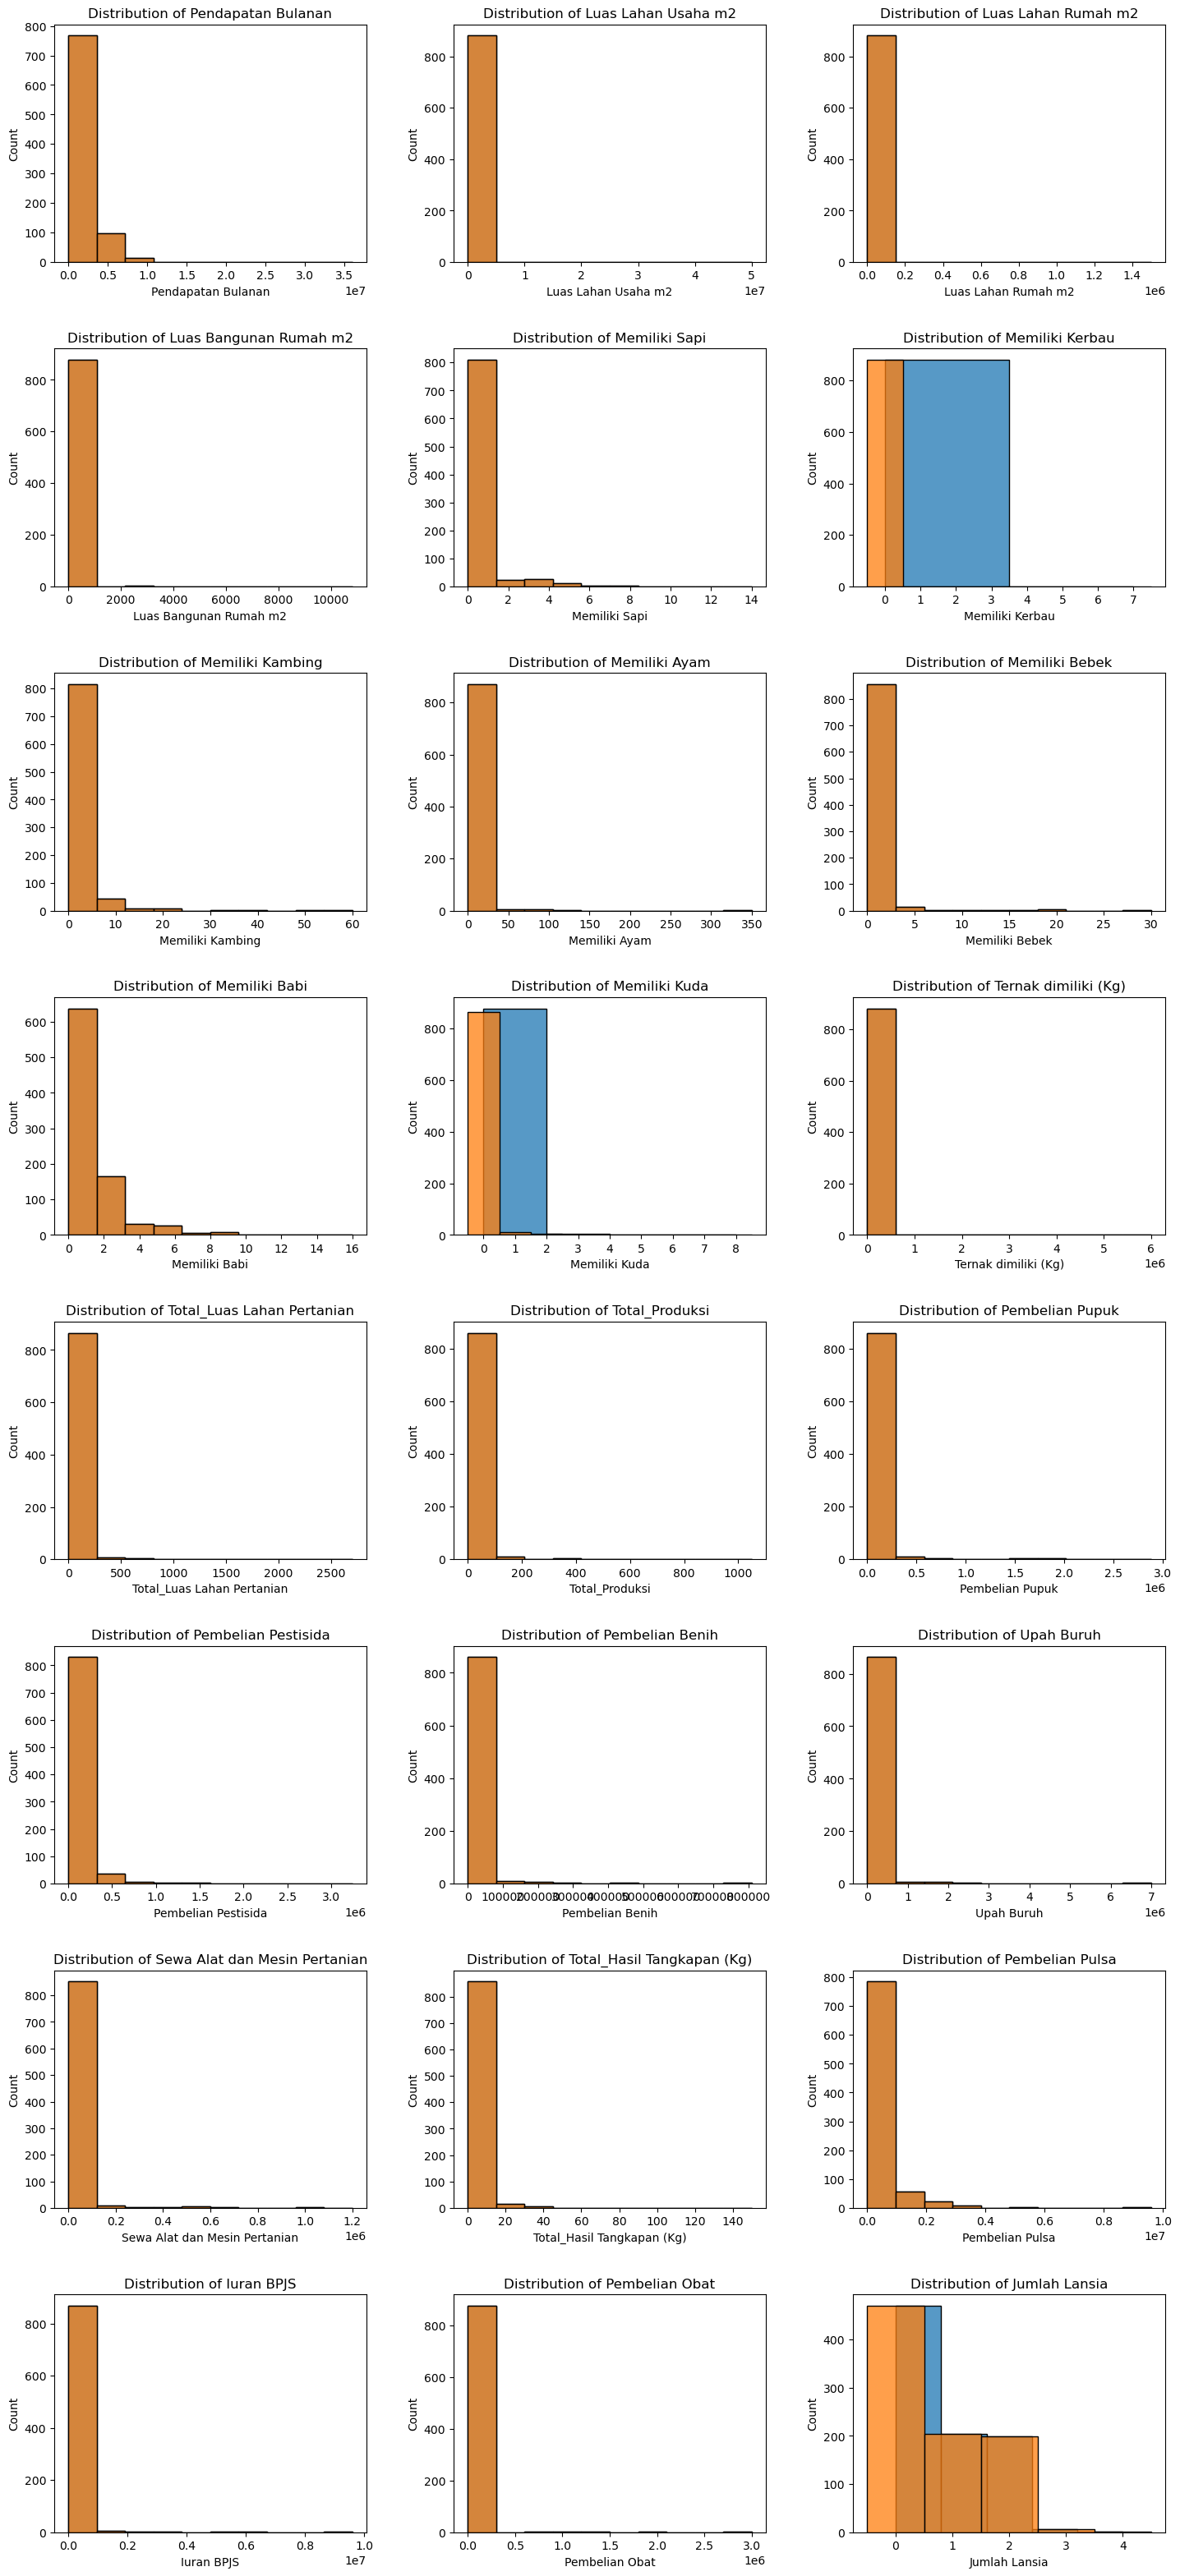

In [411]:
cols = 3
rows = math.ceil(len(numerical_cols) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.histplot(df_clean[col], kde=False, bins=min(10, df[col].nunique()), ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

for i, col in enumerate(numerical_cols):
    s = df_clean[col].dropna()

    if s.nunique() <= 10:  # anggap diskret
        bins = np.arange(s.min() - 0.5, s.max() + 1.5, 1)
        sns.histplot(s, bins=bins, ax=axes[i])
        axes[i].set_xticks(range(int(s.min()), int(s.max()) + 1))
    else:  # numerik kontinu
        sns.histplot(s, bins=10, ax=axes[i])

    axes[i].set_title(f"Distribution of {col}")
    
plt.tight_layout(pad=3)
plt.show()

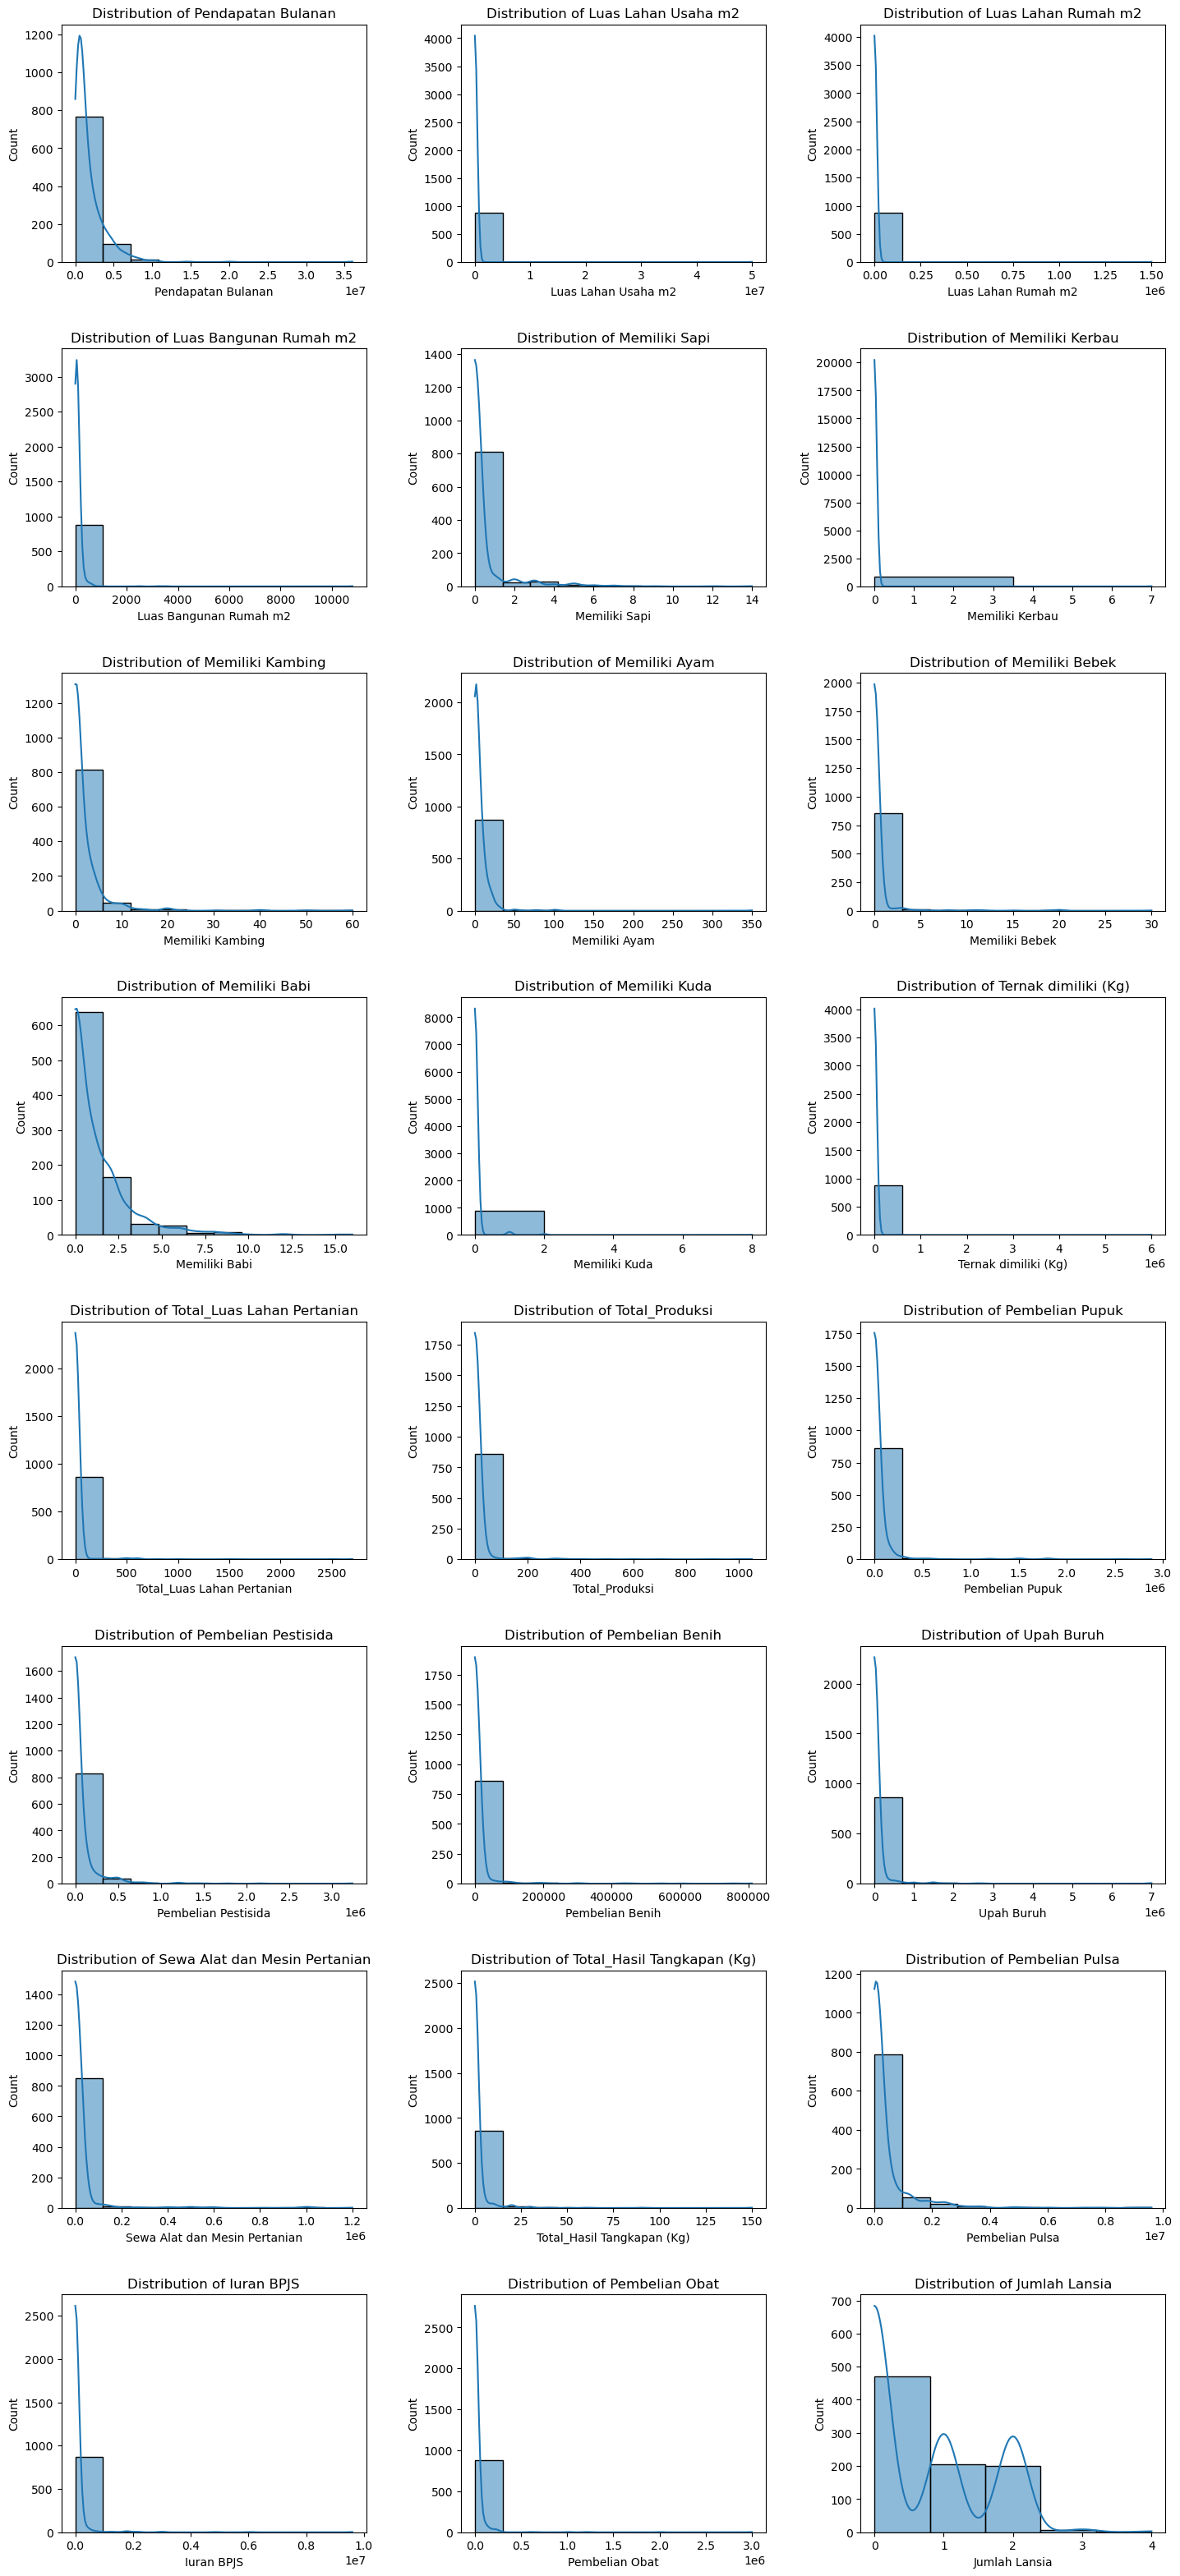

In [412]:
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.histplot(df_clean[col], kde=True, bins=min(10, df_clean[col].nunique()), ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout(pad=3)
plt.show()

C:\Users\halid\AppData\Local\Temp\ipykernel_19924\3233255710.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_clean[col],
C:\Users\halid\AppData\Local\Temp\ipykernel_19924\3233255710.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_clean[col],
C:\Users\halid\AppData\Local\Temp\ipykernel_19924\3233255710.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_clean[col],
C:\Users\halid\AppData\Local\Temp\ipykernel_19924\3233255710.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and wil

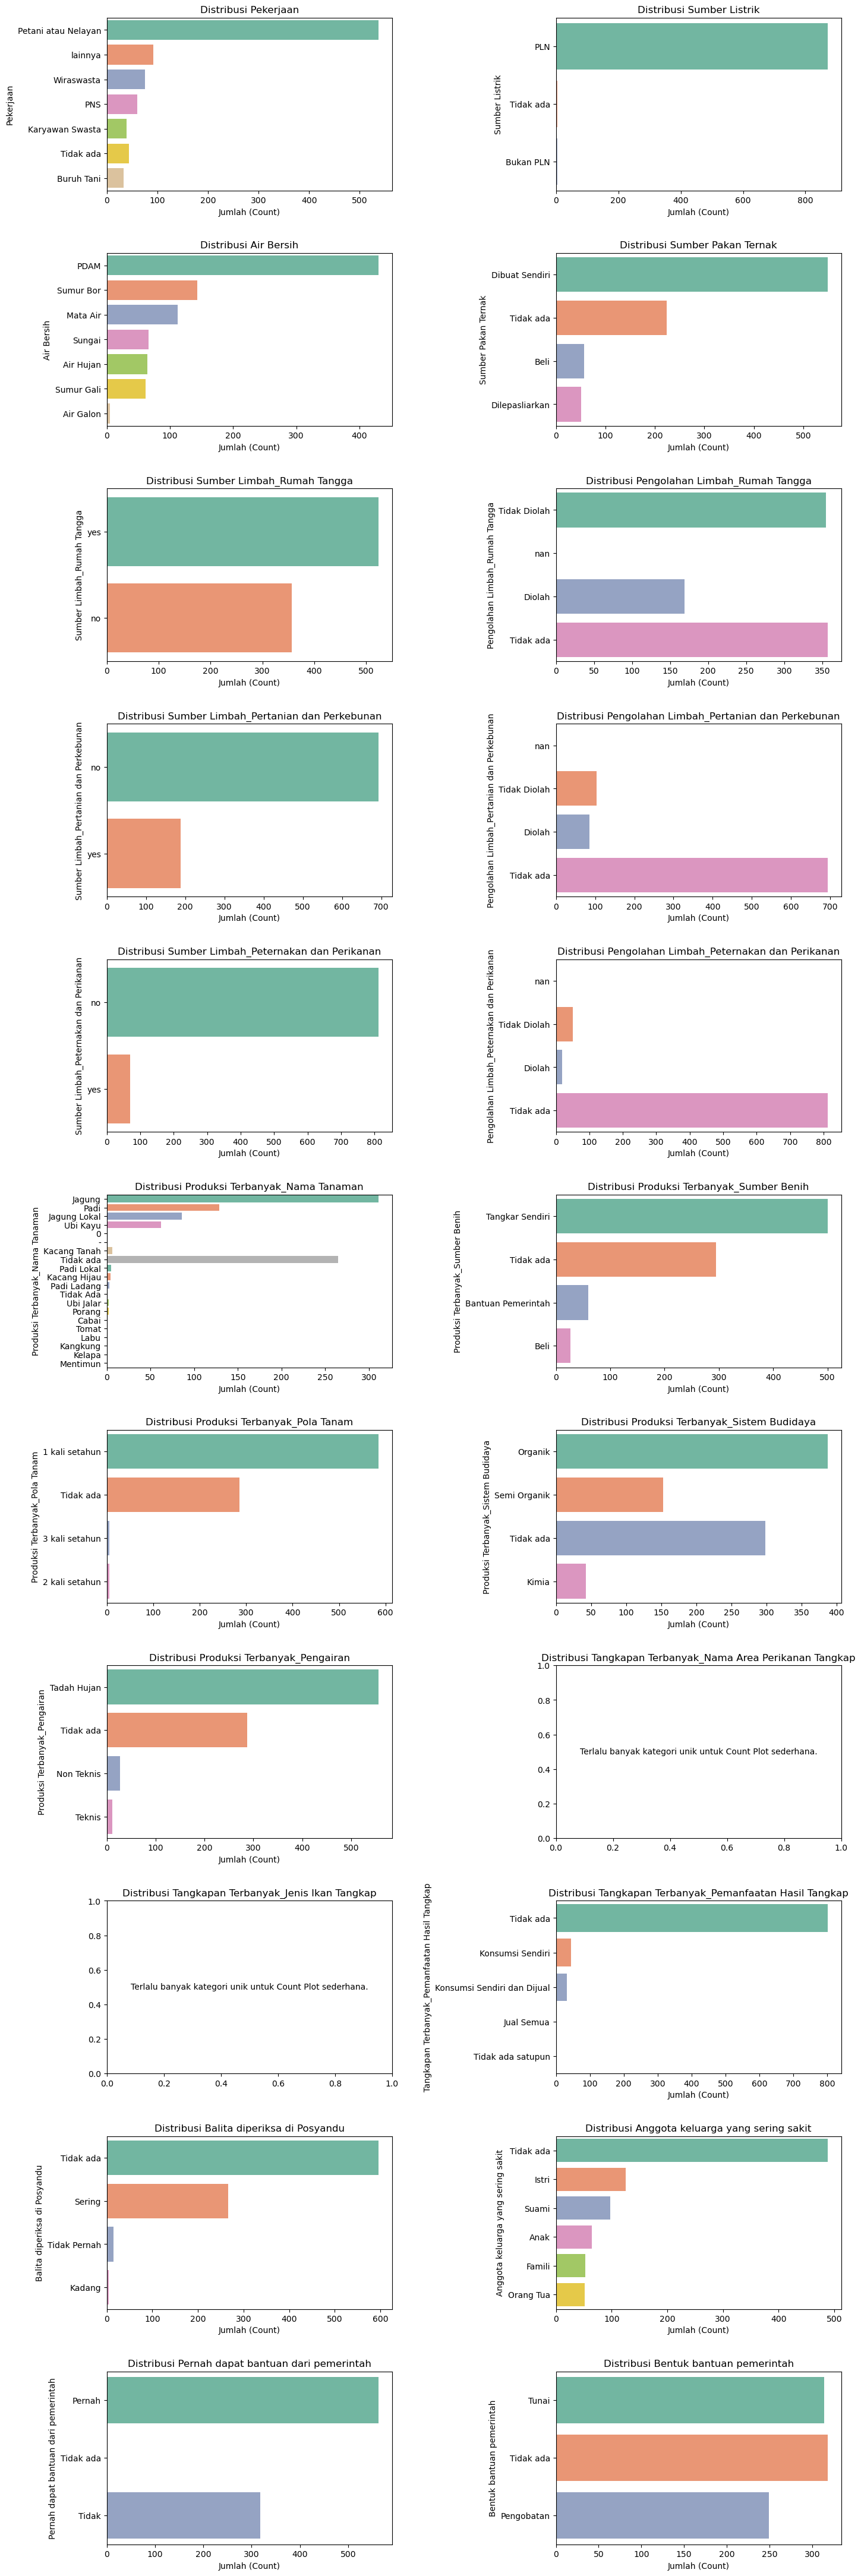

In [413]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

# ASUMSI: df adalah DataFrame Anda

# Tentukan daftar kolom kategorikal yang ingin Anda plot
# (Ini harus Anda definisikan berdasarkan analisis data Anda)
categorical_cols = [
    'Pekerjaan', 'Sumber Listrik', 'Air Bersih', 'Sumber Pakan Ternak',
    'Sumber Limbah_Rumah Tangga', 'Pengolahan Limbah_Rumah Tangga',
    'Sumber Limbah_Pertanian dan Perkebunan', 'Pengolahan Limbah_Pertanian dan Perkebunan',
    'Sumber Limbah_Peternakan dan Perikanan', 'Pengolahan Limbah_Peternakan dan Perikanan',
    'Produksi Terbanyak_Nama Tanaman', 'Produksi Terbanyak_Sumber Benih',
    'Produksi Terbanyak_Pola Tanam', 'Produksi Terbanyak_Sistem Budidaya',
    'Produksi Terbanyak_Pengairan', 'Tangkapan Terbanyak_Nama Area Perikanan Tangkap',
    'Tangkapan Terbanyak_Jenis Ikan Tangkap', 'Tangkapan Terbanyak_Pemanfaatan Hasil Tangkap',
    'Balita diperiksa di Posyandu', 'Anggota keluarga yang sering sakit',
    'Pernah dapat bantuan dari pemerintah', 'Bentuk bantuan pemerintah'
]

# Tentukan layout plot, sama seperti kode numerik Anda
cols = 2
rows = math.ceil(len(categorical_cols) / cols)

# Buat subplot
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()

# Loop untuk membuat Count Plot
# Perubahan utama: sns.histplot diganti dengan sns.countplot, dan menggunakan y= untuk horizontal bars.
for i, col in enumerate(categorical_cols):
    # Pastikan jumlah kategori tidak terlalu banyak (misal: maks 20 kategori unik)
    if df[col].nunique() <= 20:
        
        # Menggunakan countplot untuk distribusi kategori
        sns.countplot(y=df_clean[col], 
                      ax=axes[i], 
                      palette='Set2', 
                      order=df[col].value_counts().index)
        
        axes[i].set_title(f"Distribusi {col}")
        axes[i].set_ylabel(col, fontsize=10) # Label sumbu Y menjadi nama kolom
        axes[i].set_xlabel("Jumlah (Count)", fontsize=10)
        
    else:
        # Jika kategori terlalu banyak, beri pesan
        axes[i].set_title(f"Distribusi {col}", fontsize=12)
        axes[i].text(0.5, 0.5, 'Terlalu banyak kategori unik untuk Count Plot sederhana.', 
                     horizontalalignment='center', verticalalignment='center', transform=axes[i].transAxes)

# Sembunyikan subplot yang tidak terpakai
# Perhatikan bahwa 'i' di sini adalah indeks terakhir dari loop
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=3)
plt.show()

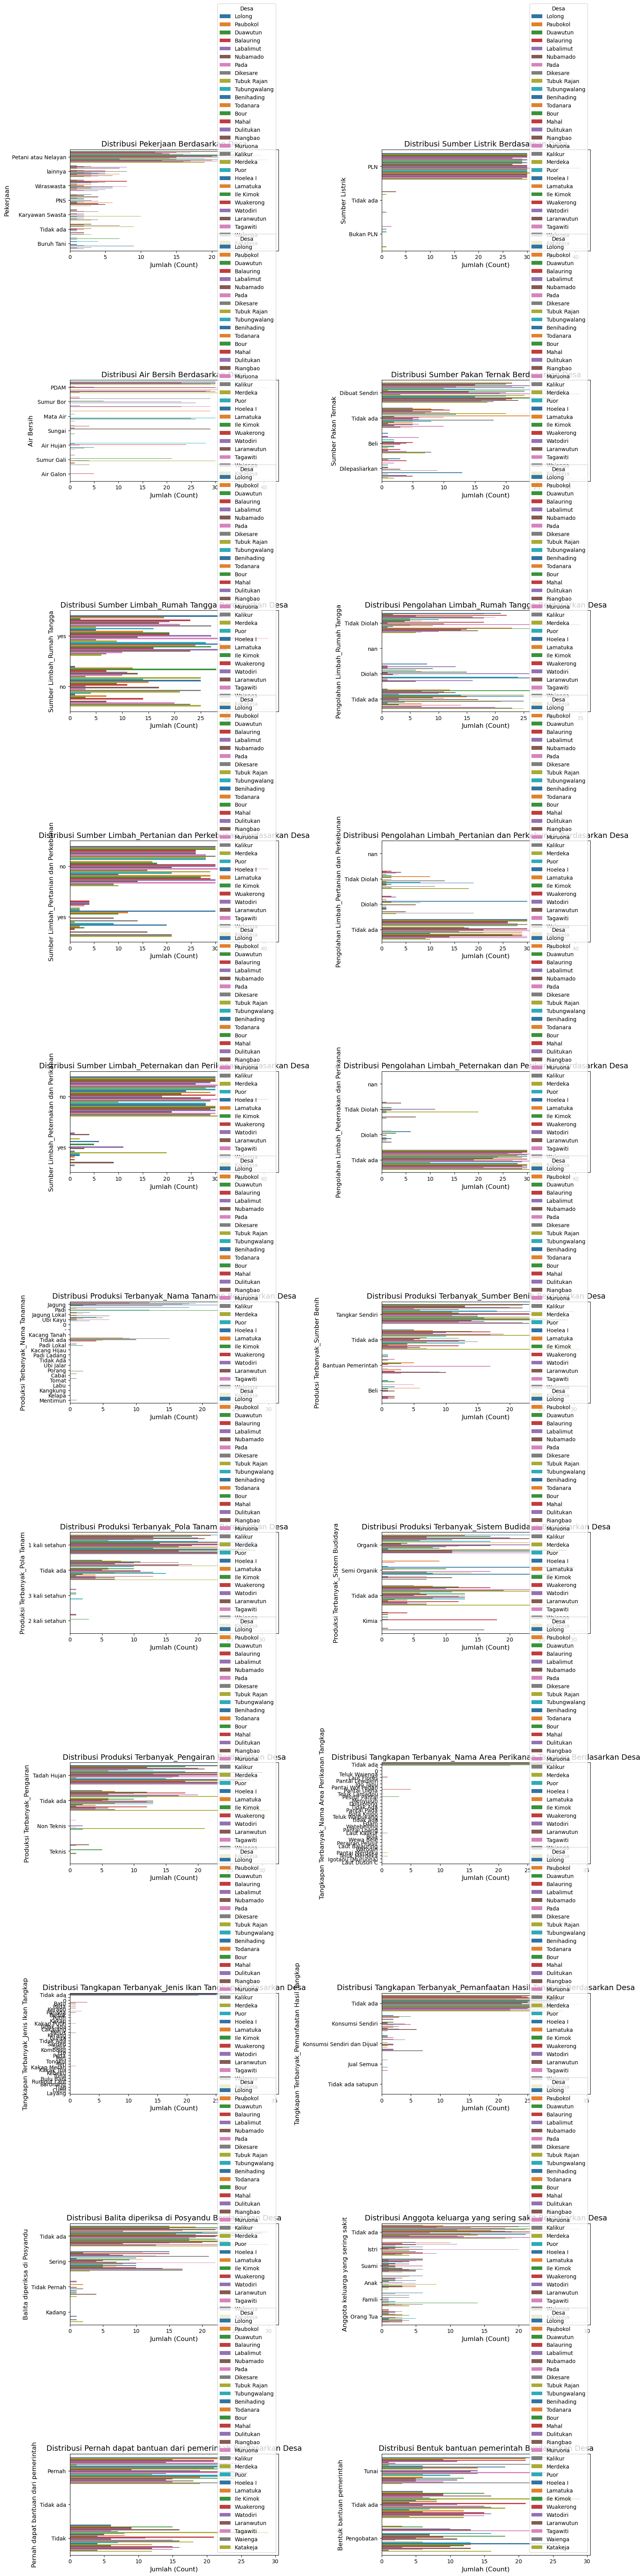

In [414]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

# ASUMSI: df adalah DataFrame Anda

# Daftar kolom kategorikal yang ingin Anda bandingkan berdasarkan 'Desa'
comparison_cols = [
    'Pekerjaan', 'Sumber Listrik', 'Air Bersih', 'Sumber Pakan Ternak',
    'Sumber Limbah_Rumah Tangga', 'Pengolahan Limbah_Rumah Tangga',
    'Sumber Limbah_Pertanian dan Perkebunan', 'Pengolahan Limbah_Pertanian dan Perkebunan',
    'Sumber Limbah_Peternakan dan Perikanan', 'Pengolahan Limbah_Peternakan dan Perikanan',
    'Produksi Terbanyak_Nama Tanaman', 'Produksi Terbanyak_Sumber Benih',
    'Produksi Terbanyak_Pola Tanam', 'Produksi Terbanyak_Sistem Budidaya',
    'Produksi Terbanyak_Pengairan', 'Tangkapan Terbanyak_Nama Area Perikanan Tangkap',
    'Tangkapan Terbanyak_Jenis Ikan Tangkap', 'Tangkapan Terbanyak_Pemanfaatan Hasil Tangkap',
    'Balita diperiksa di Posyandu', 'Anggota keluarga yang sering sakit',
    'Pernah dapat bantuan dari pemerintah', 'Bentuk bantuan pemerintah'
]

# Anda dapat menambahkan lebih banyak kolom dari daftar 22 kolom sebelumnya

# Tentukan Layout Plot
cols = 2  # 2 plot per baris
rows = math.ceil(len(comparison_cols) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 6))
axes = axes.flatten()

# Loop untuk membuat Count Plot dengan pemisahan (hue) berdasarkan 'Desa'
for i, col in enumerate(comparison_cols):
    
    # 1. Bar Plot Berkelompok (Grouped Bar Plot)
    # Visualisasi ini bagus jika jumlah Desa dan jumlah Kategori dalam 'col' tidak terlalu banyak
    sns.countplot(
        data=df_clean,
        y=col,            # Variabel kategorikal
        hue='Desa',       # Memisahkan bar berdasarkan Desa
        ax=axes[i],
        palette='tab10',
        order=df[col].value_counts().index
    )
    
    axes[i].set_title(f'Distribusi {col} Berdasarkan Desa', fontsize=14)
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].set_xlabel("Jumlah (Count)", fontsize=12)
    axes[i].legend(title='Desa', loc='lower right') # Tampilkan legenda

# Sembunyikan subplot yang tidak terpakai
for j in range(len(comparison_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=3)
plt.show()